# 1. EDA (유의미한 User 탐색), Preprocessing

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


path = './HealthData/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]

df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i, encoding='cp949')
    df = pd.concat([df,data])

df.dropna(inplace =True)
df = df[df['user_ID'] != '테스트  상민']
df = df[df['user_ID'] != '22']
df = df[df['user_ID'] != '25']
df.drop(['id'], axis=1, inplace=True)
df.drop(['Calories'], axis=1, inplace=True)
df = df.reset_index(drop = True)

# type 변경
# df['Calories']=df['Calories'].str.strip(' cal')
# df["Calories"] = pd.to_numeric(df["Calories"])
df['Datetime'] = pd.to_datetime(df['Datetime'])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66570 entries, 0 to 66569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   BPM       66570 non-null  float64       
 1   Datetime  66570 non-null  datetime64[ns]
 2   user_ID   66570 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB
None


BPM                Datetime user_ID
0        0.0 2022-09-23 12:32:56.899       1
1       87.0 2022-09-23 12:46:10.818       1
2       88.0 2022-09-23 12:46:11.870       1
3       89.0 2022-09-23 12:46:12.857       1
4       91.0 2022-09-23 12:46:13.853       1
...      ...                     ...     ...
66565  179.0 2022-09-24 15:15:28.364      98
66566  179.0 2022-09-24 15:15:29.376      98
66567  179.0 2022-09-24 15:15:30.357      98
66568  178.0 2022-09-24 15:15:31.351      98
66569  177.0 2022-09-24 15:15:32.359      98

[66570 rows x 3 columns]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66570 entries, 0 to 66569
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   BPM       66570 non-null  float64       
 1   Datetime  66570 non-null  datetime64[ns]
 2   user_ID   66570 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.5+ MB


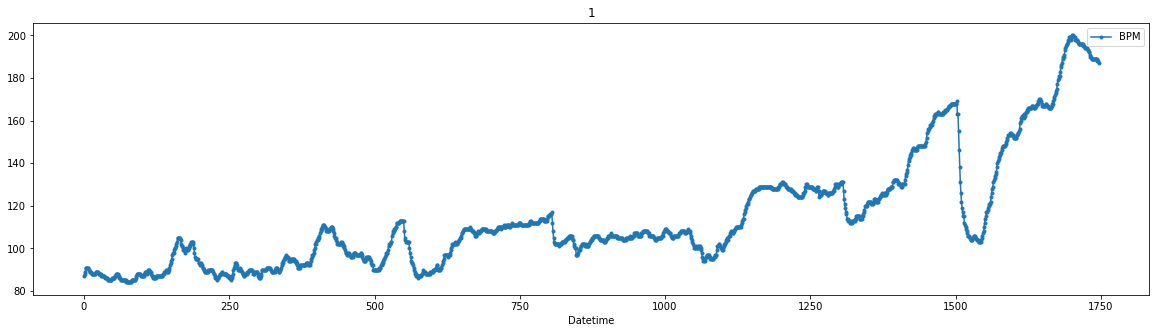

1747


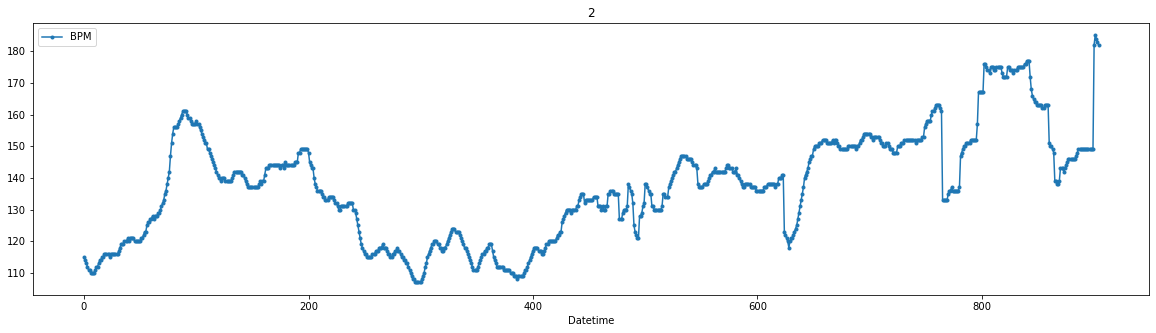

905


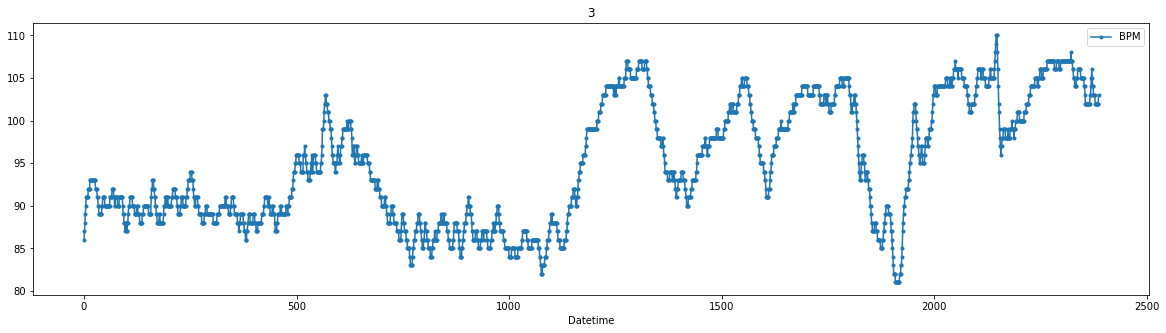

2388


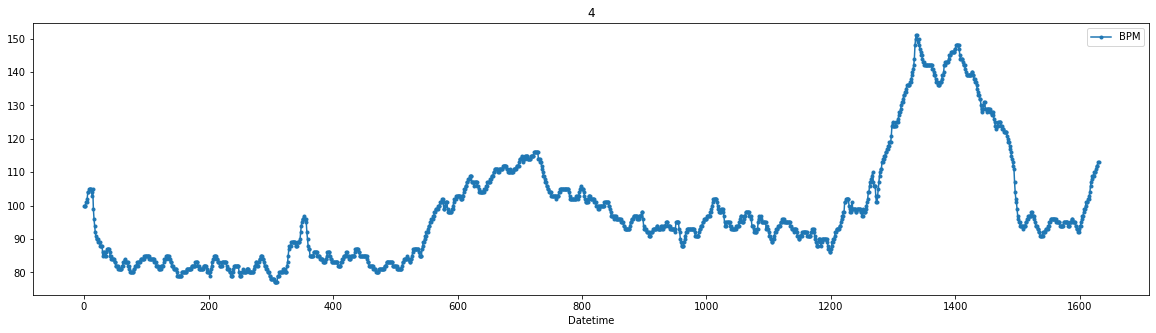

1631


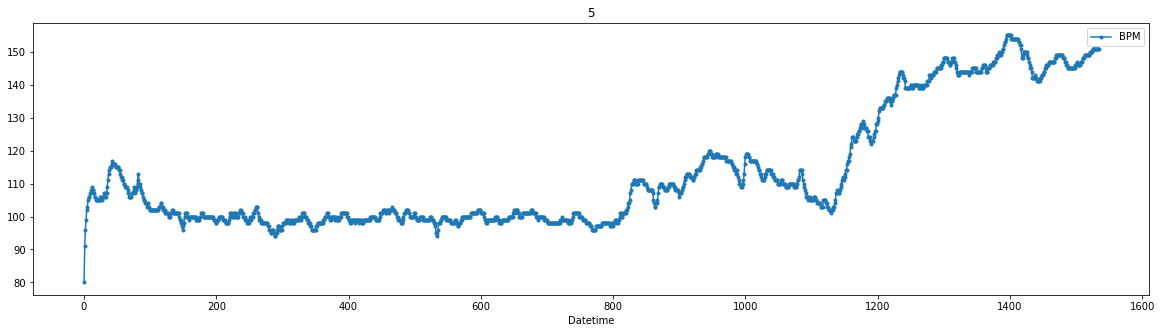

1535


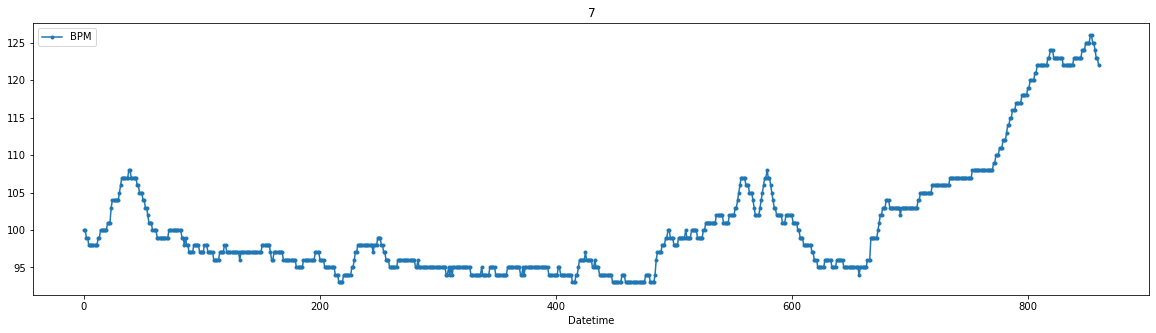

861


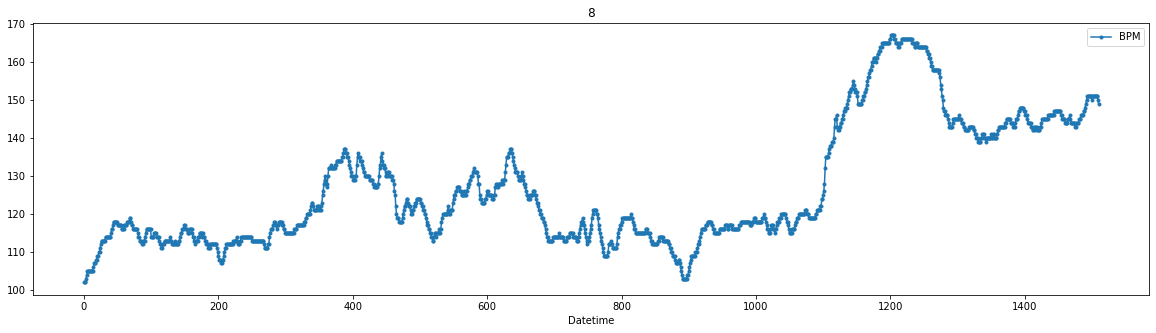

1511


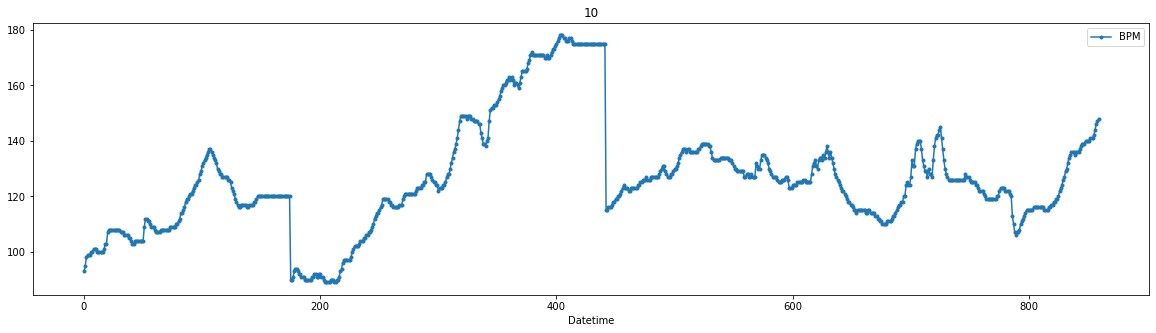

860


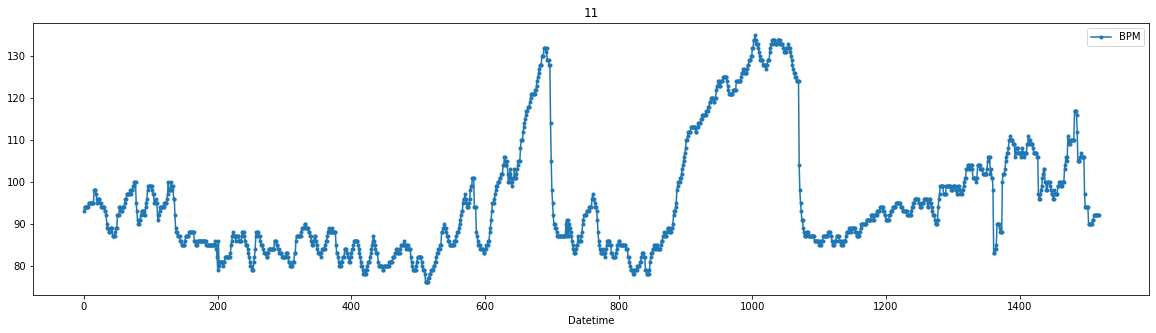

1519


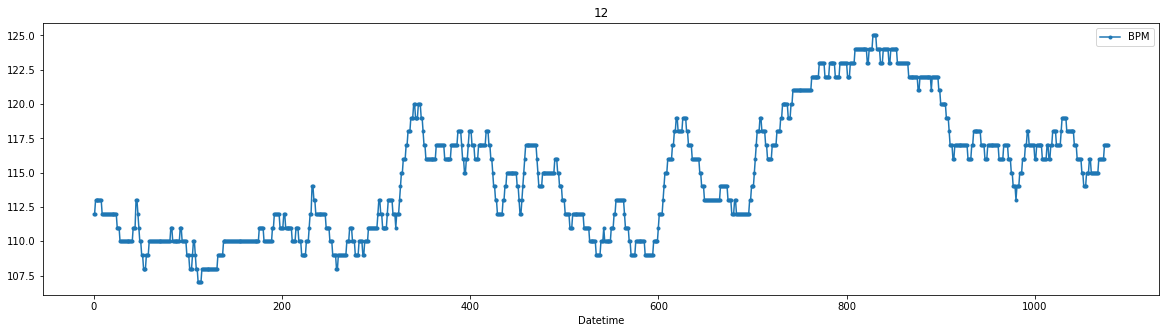

1079


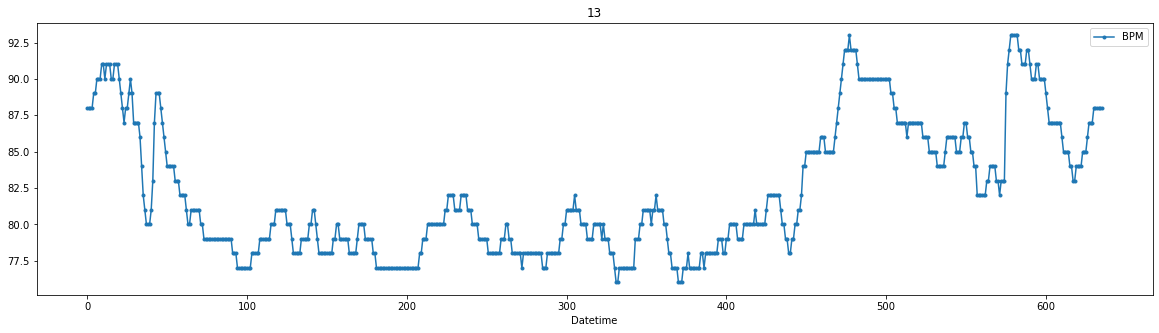

636


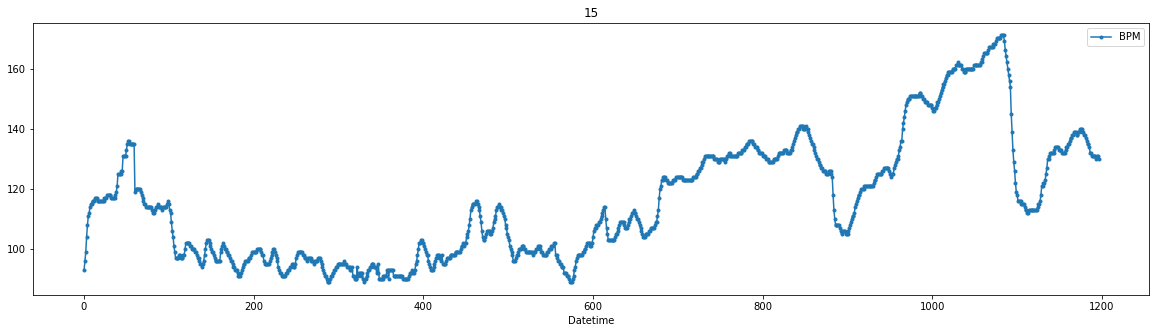

1197


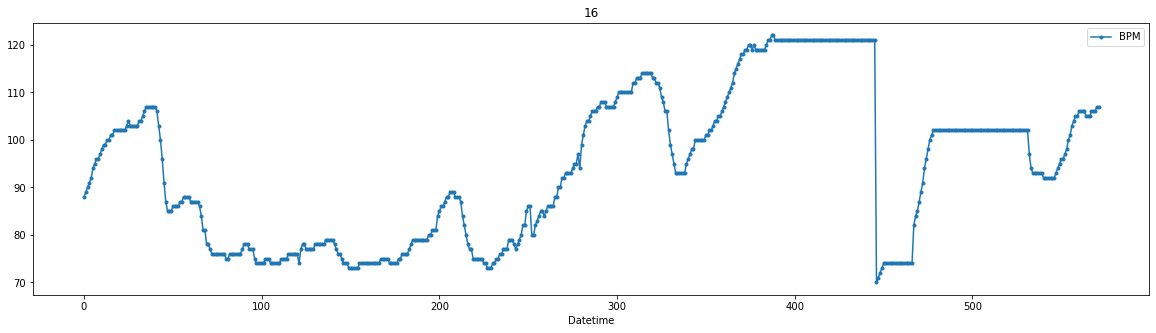

572


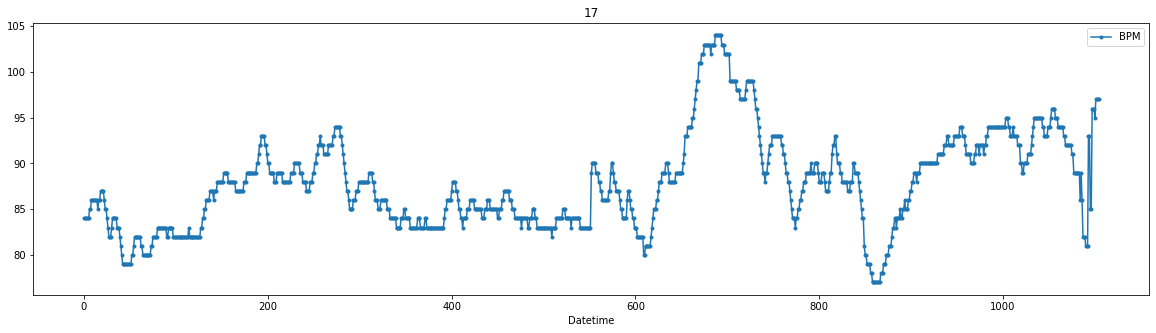

1105


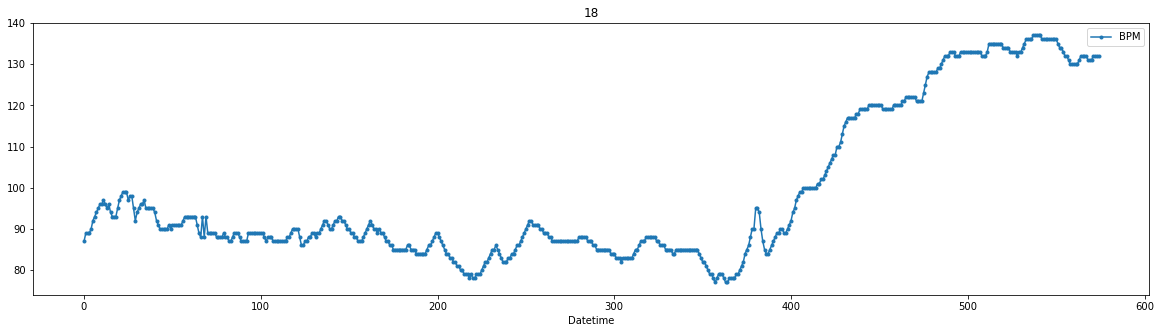

575


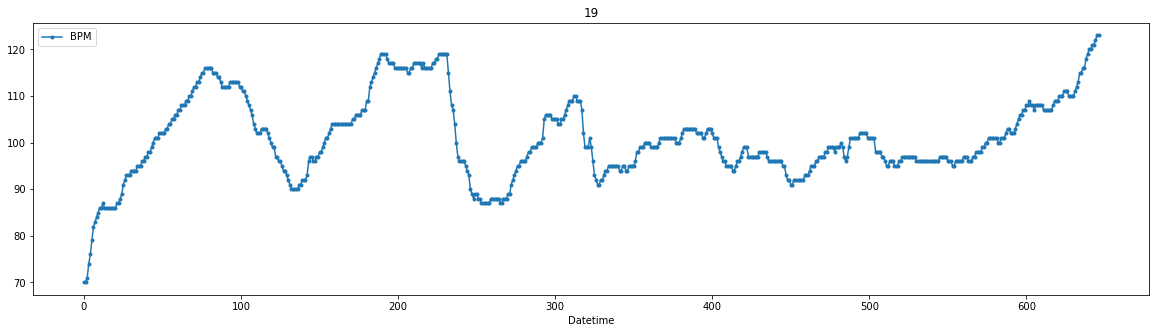

647


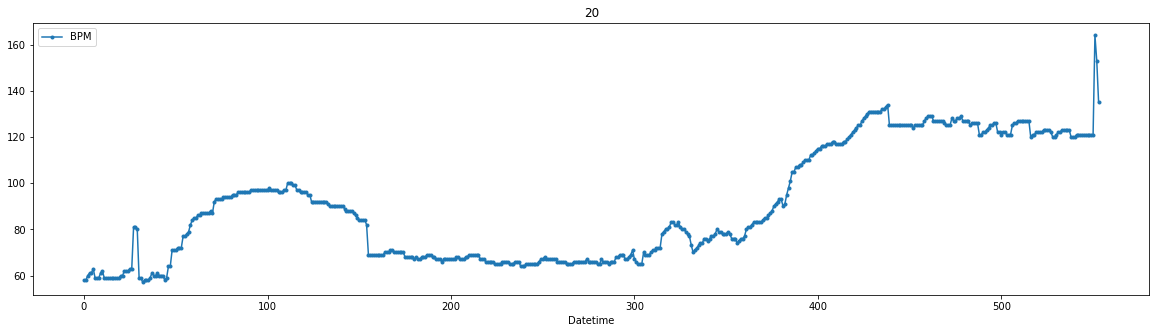

554


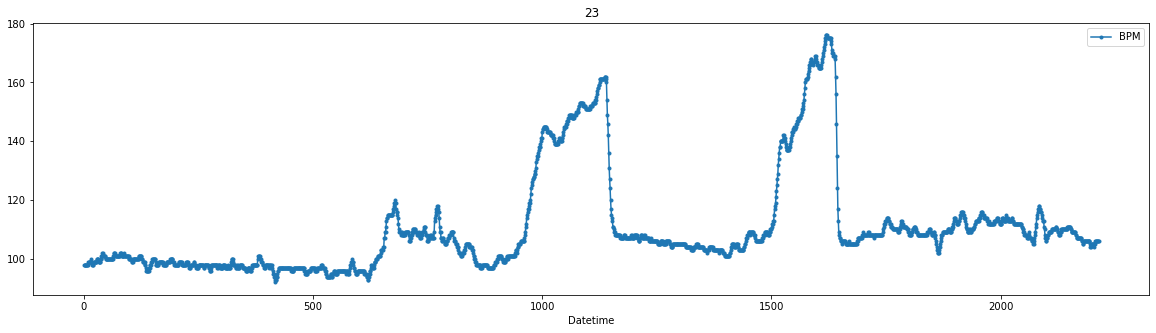

2215


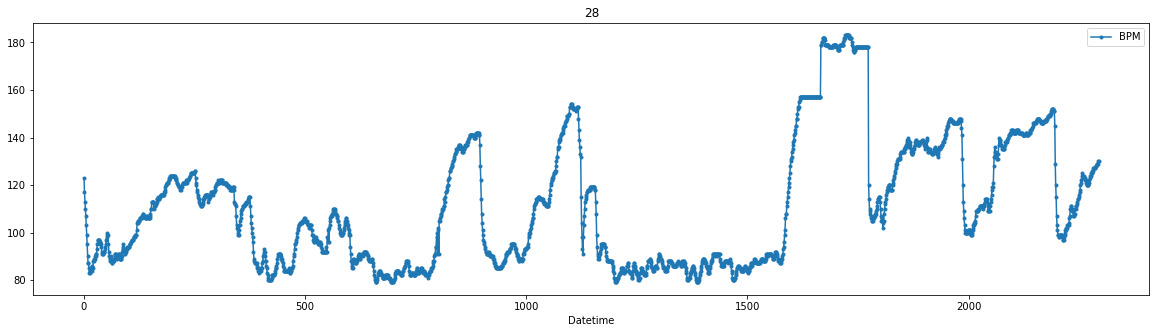

2295


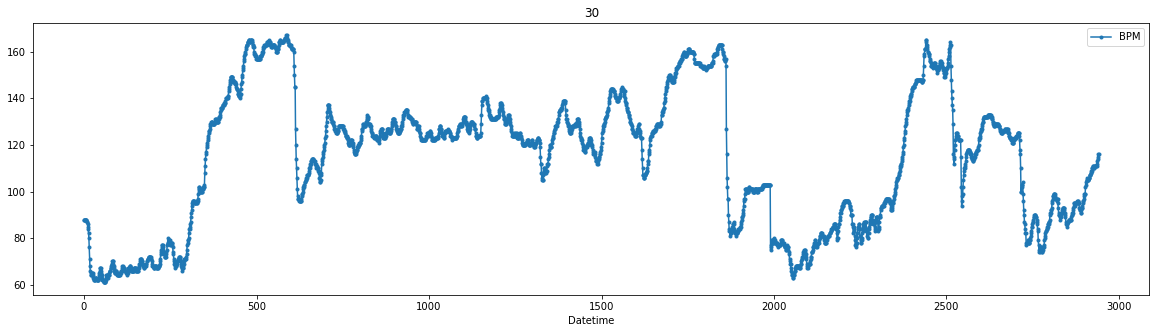

2942


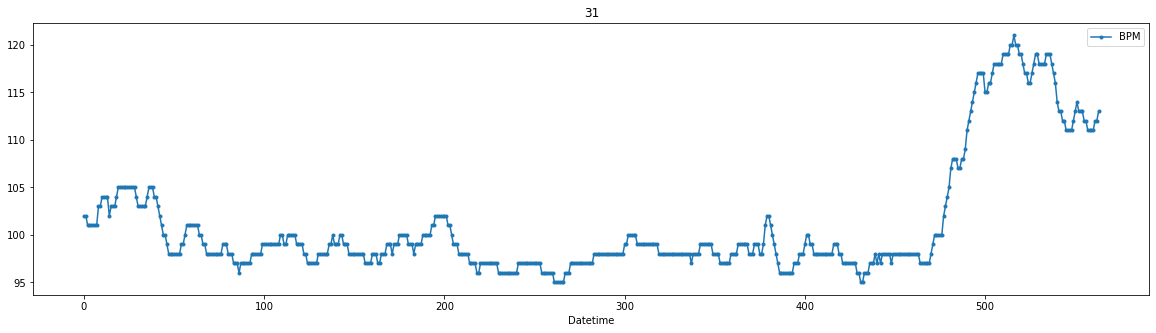

564


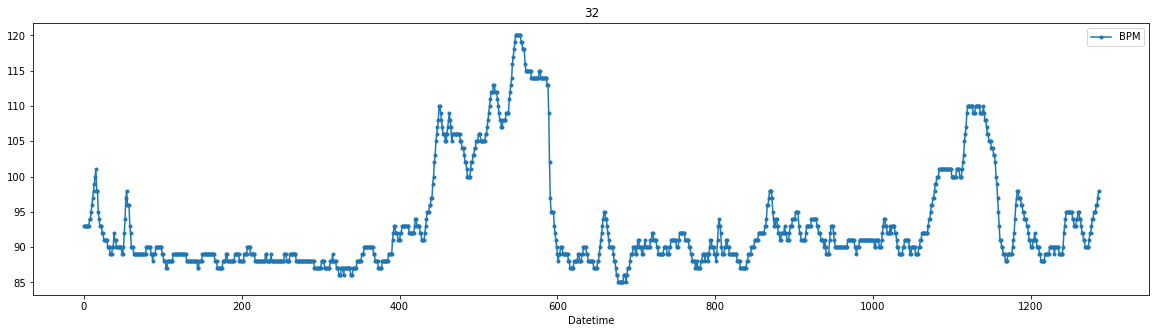

1287


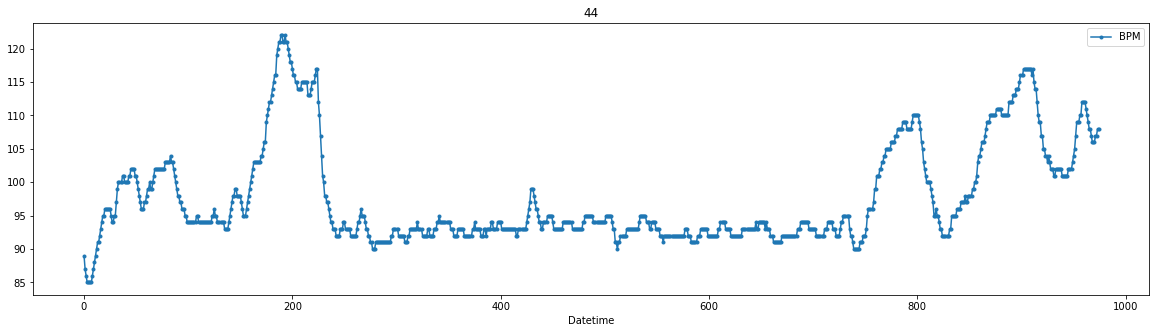

975


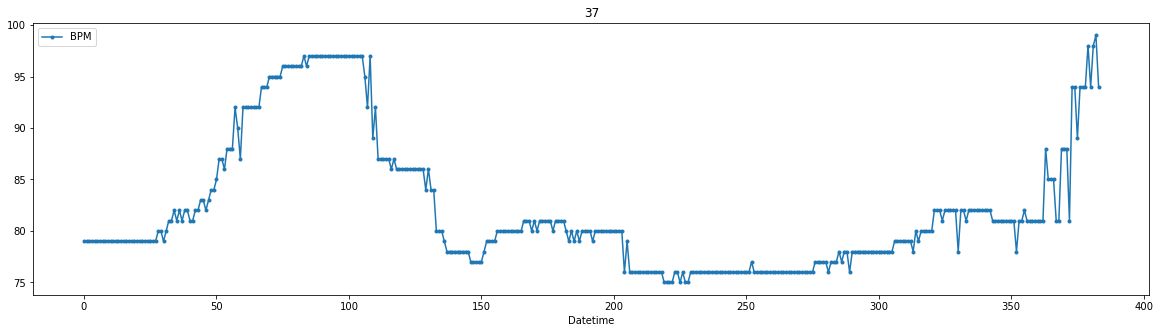

384


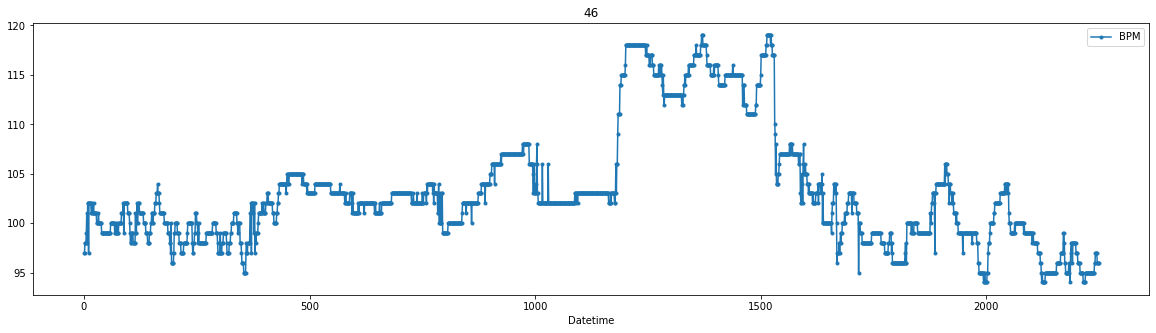

2250


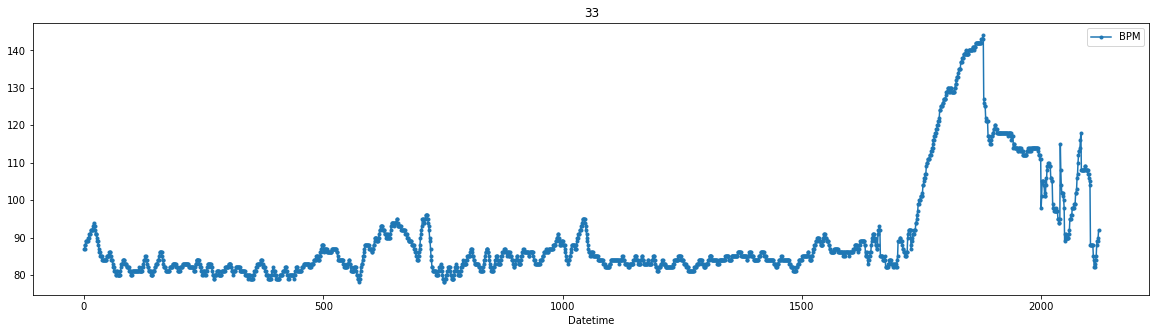

2121


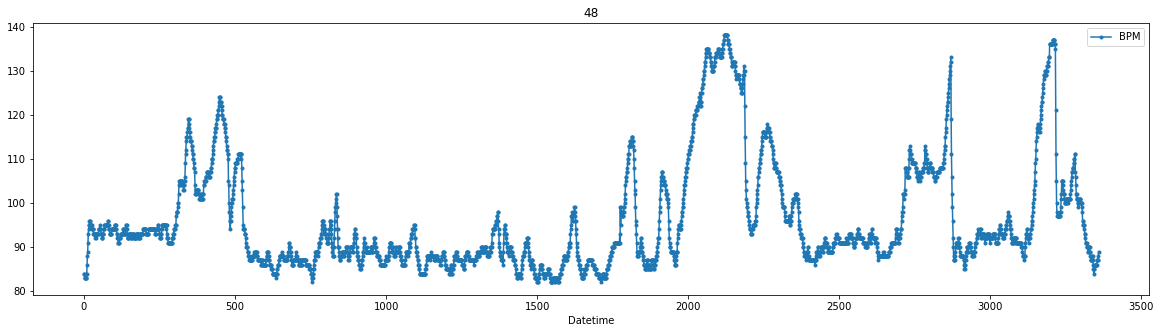

3359


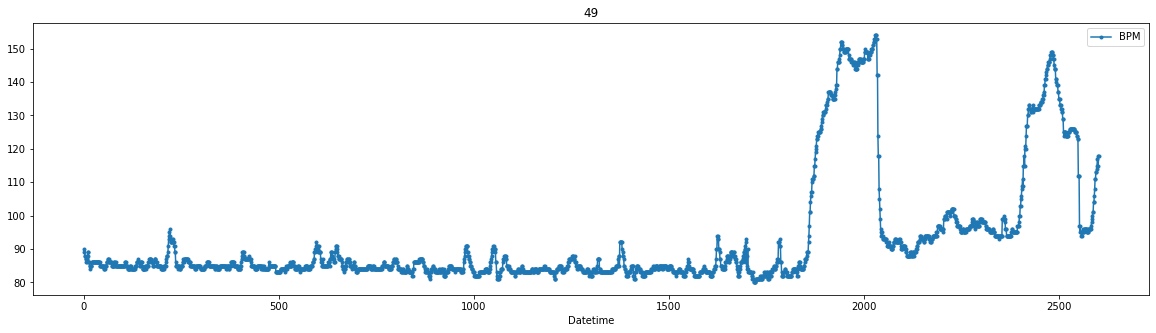

2603


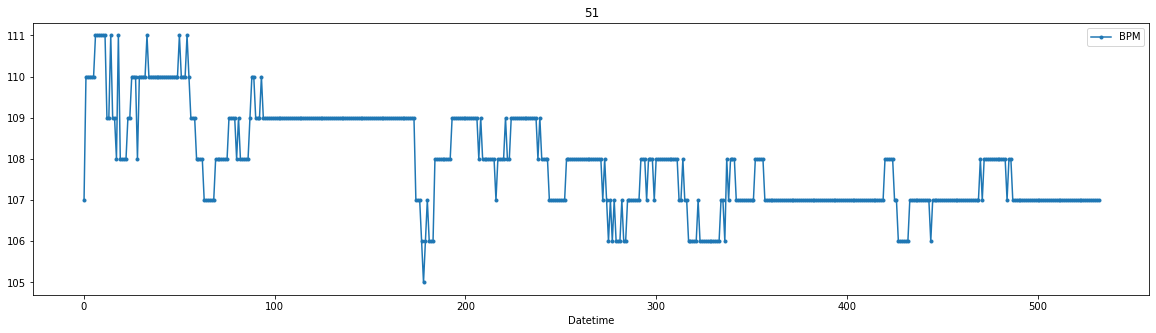

533


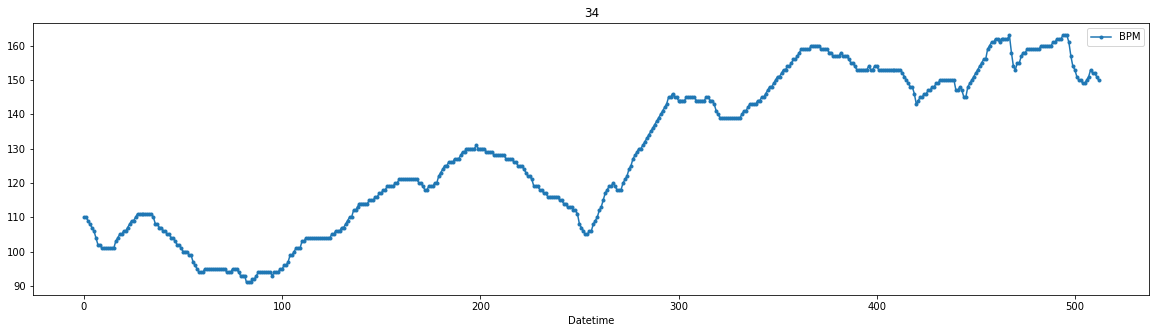

513


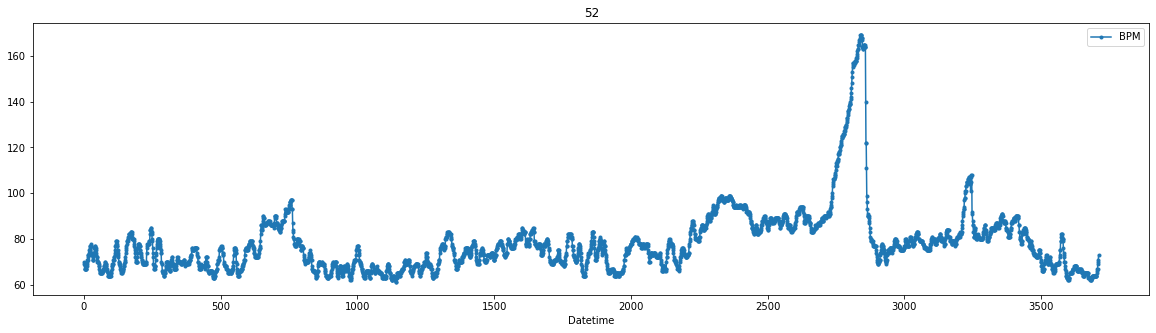

3712


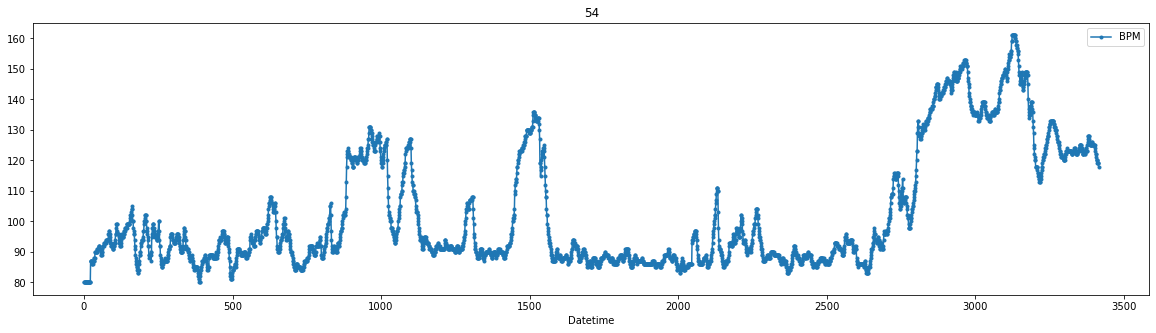

3417


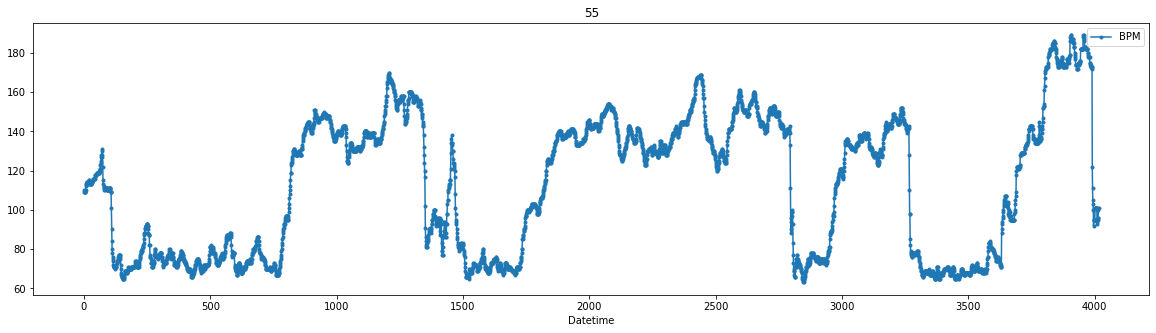

4017


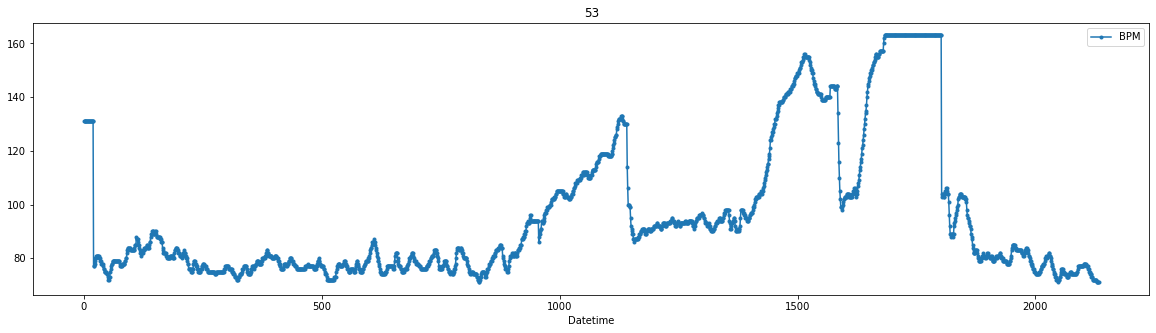

2134


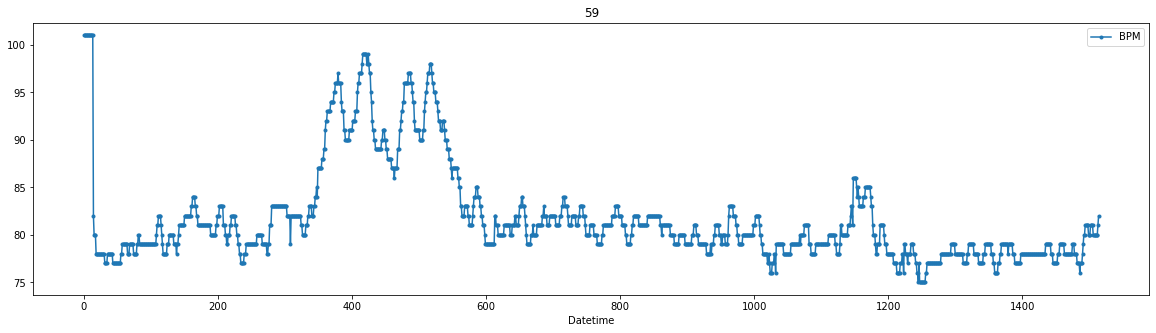

1515


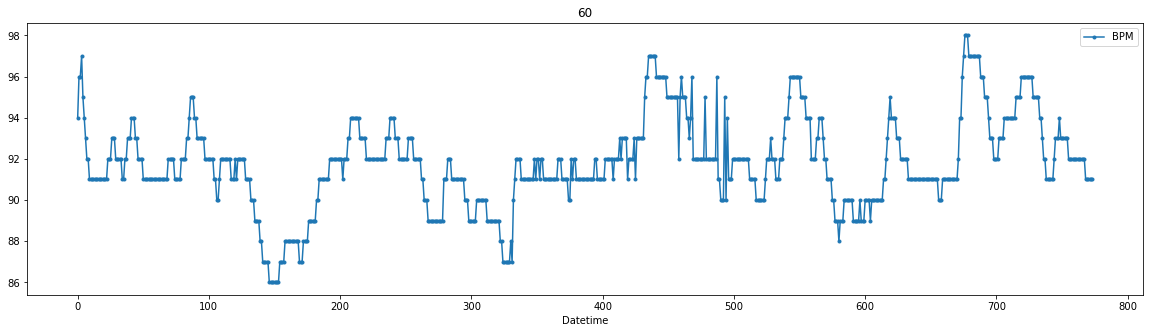

774


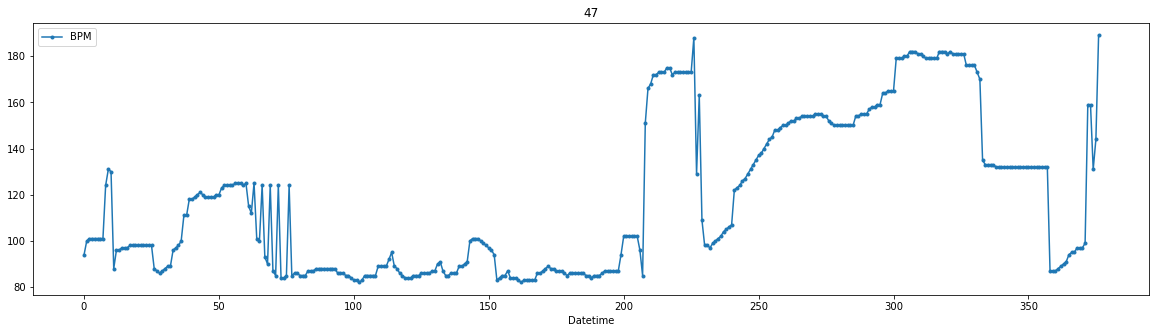

377


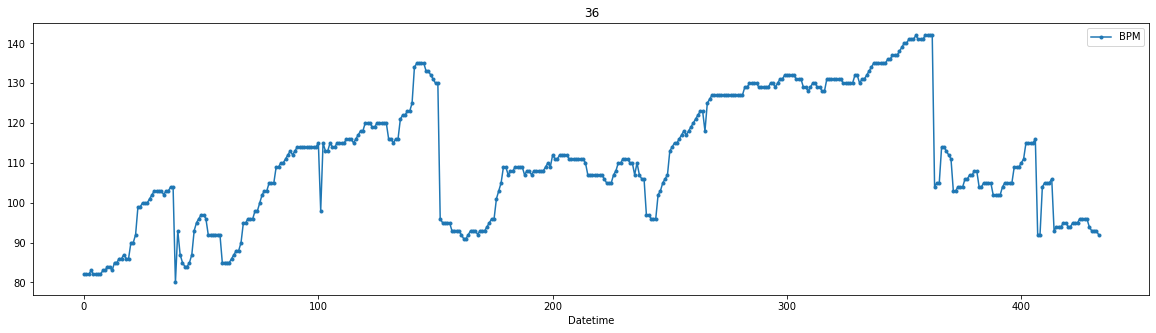

434


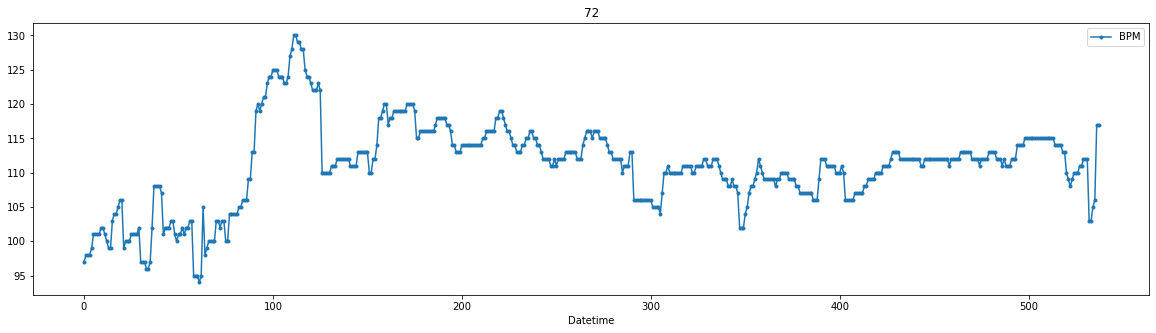

538


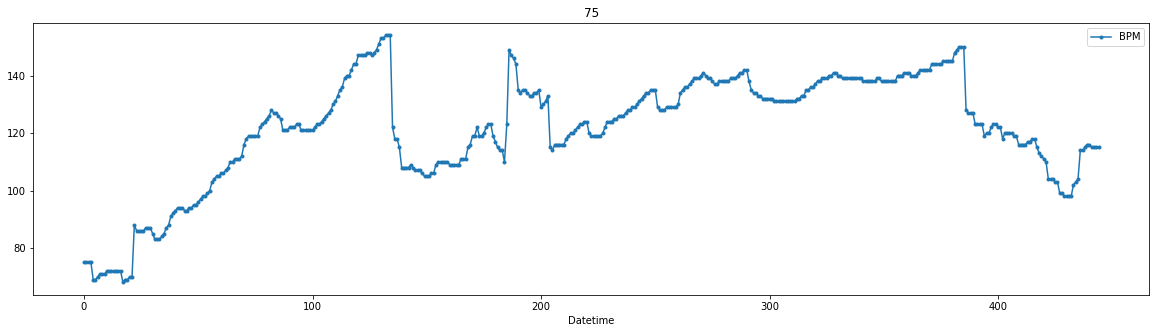

445


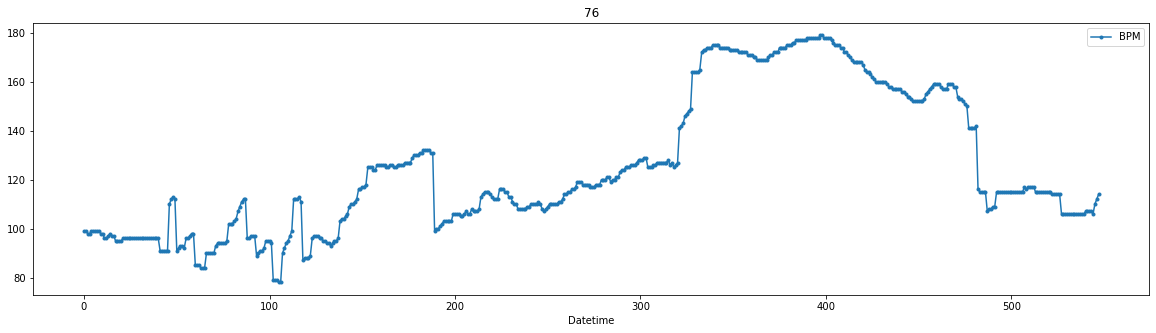

548


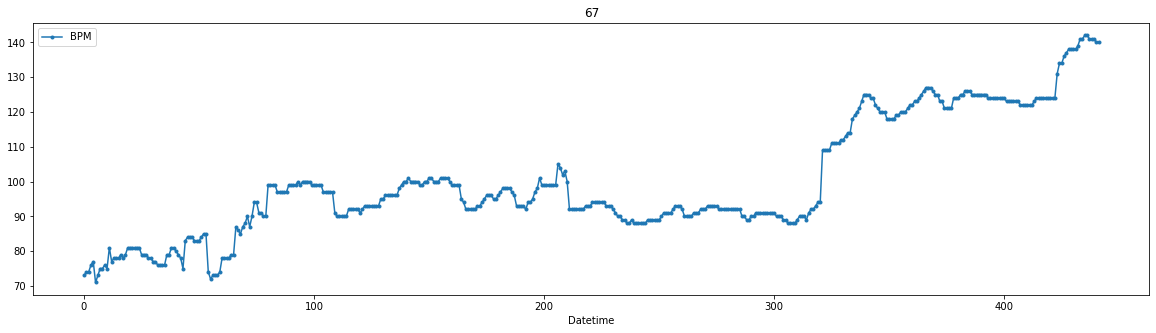

442


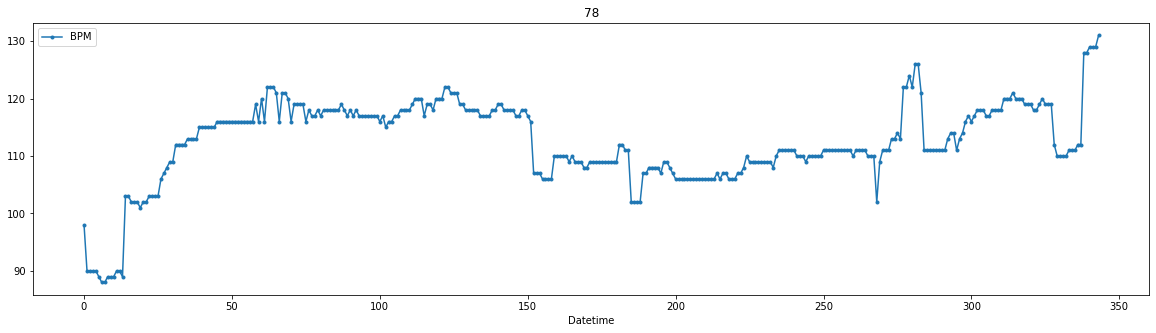

344


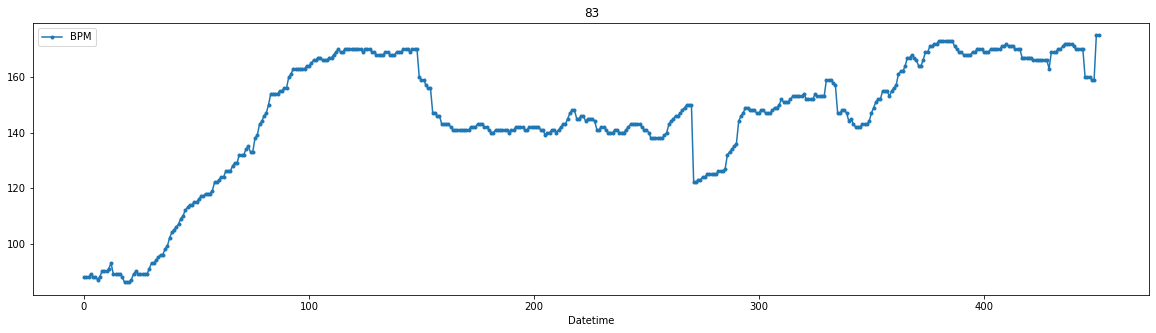

452


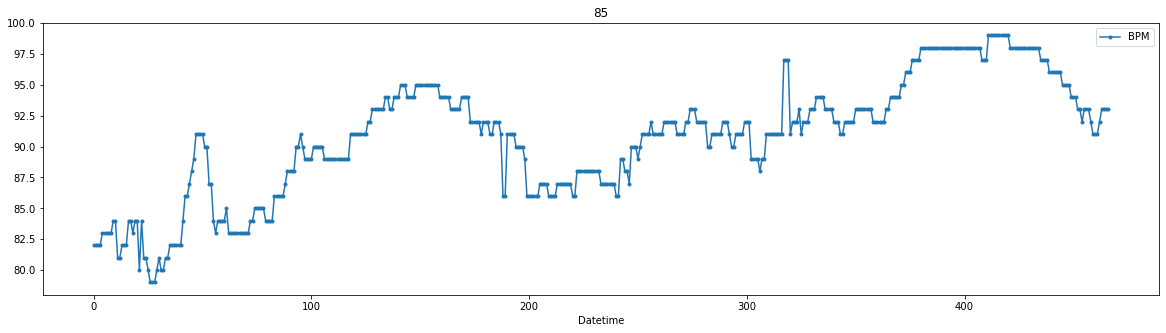

467


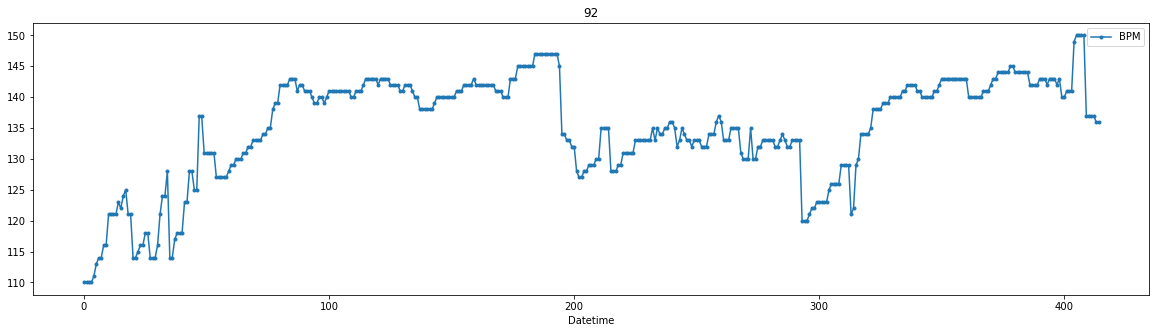

415


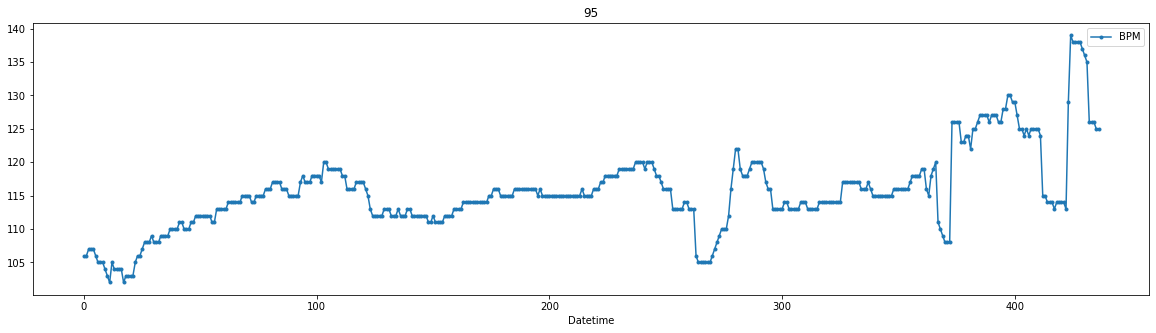

437


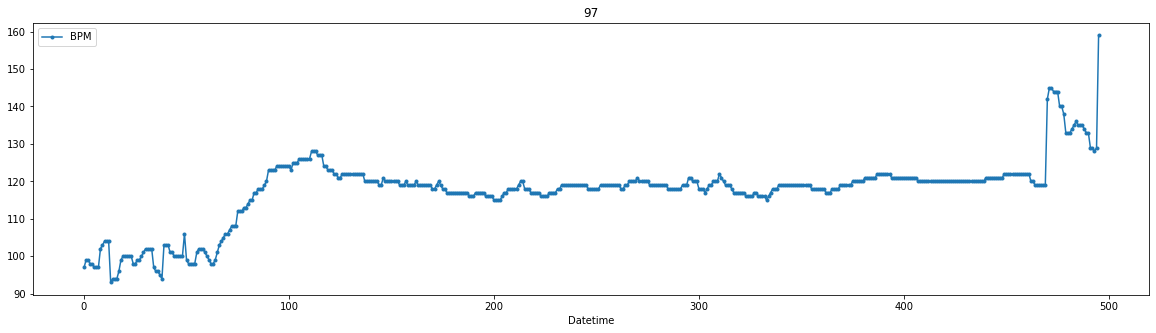

496


In [85]:
df_clean = pd.DataFrame()
userID = df["user_ID"].unique()
for id in userID:
    
    locals()['data_{}'.format(id)] = df[df['user_ID']==id]
    sub_df = locals()['data_{}'.format(id)]
    sub_df.reset_index(drop=True,inplace=True)
    
    # 앞에서
    for i in range(len(sub_df)):
        if sub_df['BPM'][i]==0.0:
            sub_df.drop([i], inplace=True)
        else:
            break
    sub_df.reset_index(drop=True,inplace=True)
    
    # 뒤에서
    for i in range(len(sub_df)-1, -1, -1):
        if sub_df['BPM'][i]==0.0:
            sub_df.drop([i], inplace=True)
        else:
            break
    sub_df.reset_index(drop=True,inplace=True)
    
    #5분 이하 데이터 제거
    if len(sub_df) < 300:
        df = df.drop(df[df['user_ID']==id].index)
        df.reset_index(drop=True,inplace=True)
        continue
    
    #중간 누락 값 이전 값으로 대체
    for i in range(len(sub_df)):
        if sub_df['BPM'][i]==0.0:
            sub_df['BPM'][i] = sub_df['BPM'][i-1]
            
    # Datetime 0,1,2,3 - - 으로 변경
    for i in range(len(sub_df)):
        sub_df['Datetime'][i] = i
        
            
    df_clean = pd.concat([df_clean, sub_df])
            
    
    

    ax = sub_df.plot(x='Datetime', y='BPM', figsize=(20,5), marker = ".")
    #sub_df.plot(x='Datetime', y='Calories', color='orange', ax=ax, marker = ".")
    
    plt.title(id)
    plt.show()
    print(len(sub_df))

In [91]:
df_clean.head()

BPM Datetime user_ID
0  87.0        0       1
1  88.0        1       1
2  89.0        2       1
3  91.0        3       1
4  91.0        4       1

In [92]:
df_clean['Datetime'] = pd.to_datetime(df_clean['Datetime'])
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62327 entries, 0 to 495
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   BPM       62327 non-null  float64       
 1   Datetime  62327 non-null  datetime64[ns]
 2   user_ID   62327 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.9+ MB
None


In [119]:
# df_clean.to_csv('df_clean.csv')
df_clean = pd.read_csv('df_clean.csv', index_col=0)

In [120]:
df_clean

BPM                       Datetime  user_ID
0     87.0  1970-01-01 00:00:00.000000000        1
1     88.0  1970-01-01 00:00:00.000000001        1
2     89.0  1970-01-01 00:00:00.000000002        1
3     91.0  1970-01-01 00:00:00.000000003        1
4     91.0  1970-01-01 00:00:00.000000004        1
..     ...                            ...      ...
491  129.0  1970-01-01 00:00:00.000000491       97
492  129.0  1970-01-01 00:00:00.000000492       97
493  128.0  1970-01-01 00:00:00.000000493       97
494  129.0  1970-01-01 00:00:00.000000494       97
495  159.0  1970-01-01 00:00:00.000000495       97

[62327 rows x 3 columns]

In [121]:
data_id = df_clean["user_ID"].unique()
print(data_id)
for id in data_id:
    print("user_id : ", id)
    display(locals()['data_{}'.format(id)])

[ 1  2  3  4  5  7  8 10 11 12 13 15 16 17 18 19 20 23 28 30 31 32 44 37
 46 33 48 49 51 34 52 54 55 53 59 60 47 36 72 75 76 67 78 83 85 92 95 97]
user_id :  1


BPM Datetime user_ID
0      87.0        0       1
1      88.0        1       1
2      89.0        2       1
3      91.0        3       1
4      91.0        4       1
...     ...      ...     ...
1742  189.0     1742       1
1743  189.0     1743       1
1744  188.0     1744       1
1745  188.0     1745       1
1746  187.0     1746       1

[1747 rows x 3 columns]

user_id :  2


BPM Datetime user_ID
0    115.0        0       2
1    114.0        1       2
2    113.0        2       2
3    112.0        3       2
4    111.0        4       2
..     ...      ...     ...
900  182.0      900       2
901  185.0      901       2
902  184.0      902       2
903  183.0      903       2
904  182.0      904       2

[905 rows x 3 columns]

user_id :  3


BPM Datetime user_ID
0      86.0        0       3
1      87.0        1       3
2      88.0        2       3
3      89.0        3       3
4      90.0        4       3
...     ...      ...     ...
2383  102.0     2383       3
2384  102.0     2384       3
2385  102.0     2385       3
2386  102.0     2386       3
2387  103.0     2387       3

[2388 rows x 3 columns]

user_id :  4


BPM Datetime user_ID
0     100.0        0       4
1     100.0        1       4
2     100.0        2       4
3     101.0        3       4
4     101.0        4       4
...     ...      ...     ...
1626  111.0     1626       4
1627  112.0     1627       4
1628  112.0     1628       4
1629  113.0     1629       4
1630  113.0     1630       4

[1631 rows x 3 columns]

user_id :  5


BPM Datetime user_ID
0      80.0        0       5
1      91.0        1       5
2      96.0        2       5
3      99.0        3       5
4     102.0        4       5
...     ...      ...     ...
1530  151.0     1530       5
1531  151.0     1531       5
1532  151.0     1532       5
1533  151.0     1533       5
1534  151.0     1534       5

[1535 rows x 3 columns]

user_id :  7


BPM Datetime user_ID
0    100.0        0       7
1    100.0        1       7
2     99.0        2       7
3     99.0        3       7
4     98.0        4       7
..     ...      ...     ...
856  125.0      856       7
857  124.0      857       7
858  123.0      858       7
859  123.0      859       7
860  122.0      860       7

[861 rows x 3 columns]

user_id :  8


BPM Datetime user_ID
0     102.0        0       8
1     102.0        1       8
2     102.0        2       8
3     103.0        3       8
4     104.0        4       8
...     ...      ...     ...
1506  151.0     1506       8
1507  151.0     1507       8
1508  151.0     1508       8
1509  150.0     1509       8
1510  149.0     1510       8

[1511 rows x 3 columns]

user_id :  10


BPM Datetime user_ID
0     93.0        0      10
1     95.0        1      10
2     98.0        2      10
3     99.0        3      10
4     99.0        4      10
..     ...      ...     ...
855  142.0      855      10
856  144.0      856      10
857  146.0      857      10
858  147.0      858      10
859  148.0      859      10

[860 rows x 3 columns]

user_id :  11


BPM Datetime user_ID
0     93.0        0      11
1     94.0        1      11
2     94.0        2      11
3     94.0        3      11
4     94.0        4      11
...    ...      ...     ...
1514  92.0     1514      11
1515  92.0     1515      11
1516  92.0     1516      11
1517  92.0     1517      11
1518  92.0     1518      11

[1519 rows x 3 columns]

user_id :  12


BPM Datetime user_ID
0     112.0        0      12
1     112.0        1      12
2     113.0        2      12
3     113.0        3      12
4     113.0        4      12
...     ...      ...     ...
1074  117.0     1074      12
1075  117.0     1075      12
1076  117.0     1076      12
1077  117.0     1077      12
1078  117.0     1078      12

[1079 rows x 3 columns]

user_id :  13


BPM Datetime user_ID
0    88.0        0      13
1    88.0        1      13
2    88.0        2      13
3    88.0        3      13
4    89.0        4      13
..    ...      ...     ...
631  88.0      631      13
632  88.0      632      13
633  88.0      633      13
634  88.0      634      13
635  88.0      635      13

[636 rows x 3 columns]

user_id :  15


BPM Datetime user_ID
0      93.0        0      15
1      96.0        1      15
2      99.0        2      15
3     104.0        3      15
4     108.0        4      15
...     ...      ...     ...
1192  131.0     1192      15
1193  130.0     1193      15
1194  131.0     1194      15
1195  131.0     1195      15
1196  130.0     1196      15

[1197 rows x 3 columns]

user_id :  16


BPM Datetime user_ID
0     88.0        0      16
1     89.0        1      16
2     90.0        2      16
3     91.0        3      16
4     92.0        4      16
..     ...      ...     ...
567  106.0      567      16
568  106.0      568      16
569  106.0      569      16
570  107.0      570      16
571  107.0      571      16

[572 rows x 3 columns]

user_id :  17


BPM Datetime user_ID
0     84.0        0      17
1     84.0        1      17
2     84.0        2      17
3     84.0        3      17
4     84.0        4      17
...    ...      ...     ...
1100  95.0     1100      17
1101  97.0     1101      17
1102  97.0     1102      17
1103  97.0     1103      17
1104  97.0     1104      17

[1105 rows x 3 columns]

user_id :  18


BPM Datetime user_ID
0     87.0        0      18
1     89.0        1      18
2     89.0        2      18
3     89.0        3      18
4     90.0        4      18
..     ...      ...     ...
570  131.0      570      18
571  132.0      571      18
572  132.0      572      18
573  132.0      573      18
574  132.0      574      18

[575 rows x 3 columns]

user_id :  19


BPM Datetime user_ID
0     70.0        0      19
1     70.0        1      19
2     71.0        2      19
3     74.0        3      19
4     76.0        4      19
..     ...      ...     ...
642  121.0      642      19
643  121.0      643      19
644  122.0      644      19
645  123.0      645      19
646  123.0      646      19

[647 rows x 3 columns]

user_id :  20


BPM Datetime user_ID
0     58.0        0      20
1     58.0        1      20
2     60.0        2      20
3     61.0        3      20
4     61.0        4      20
..     ...      ...     ...
549  121.0      549      20
550  121.0      550      20
551  164.0      551      20
552  153.0      552      20
553  135.0      553      20

[554 rows x 3 columns]

user_id :  23


BPM Datetime user_ID
0      98.0        0      23
1      98.0        1      23
2      98.0        2      23
3      98.0        3      23
4      98.0        4      23
...     ...      ...     ...
2210  106.0     2210      23
2211  106.0     2211      23
2212  106.0     2212      23
2213  106.0     2213      23
2214  106.0     2214      23

[2215 rows x 3 columns]

user_id :  28


BPM Datetime user_ID
0     123.0        0      28
1     117.0        1      28
2     113.0        2      28
3     110.0        3      28
4     107.0        4      28
...     ...      ...     ...
2290  129.0     2290      28
2291  129.0     2291      28
2292  129.0     2292      28
2293  130.0     2293      28
2294  130.0     2294      28

[2295 rows x 3 columns]

user_id :  30


BPM Datetime user_ID
0      88.0        0      30
1      88.0        1      30
2      88.0        2      30
3      88.0        3      30
4      88.0        4      30
...     ...      ...     ...
2937  113.0     2937      30
2938  114.0     2938      30
2939  115.0     2939      30
2940  116.0     2940      30
2941  116.0     2941      30

[2942 rows x 3 columns]

user_id :  31


BPM Datetime user_ID
0    102.0        0      31
1    102.0        1      31
2    101.0        2      31
3    101.0        3      31
4    101.0        4      31
..     ...      ...     ...
559  111.0      559      31
560  111.0      560      31
561  112.0      561      31
562  112.0      562      31
563  113.0      563      31

[564 rows x 3 columns]

user_id :  32


BPM Datetime user_ID
0     93.0        0      32
1     93.0        1      32
2     93.0        2      32
3     93.0        3      32
4     93.0        4      32
...    ...      ...     ...
1282  95.0     1282      32
1283  96.0     1283      32
1284  96.0     1284      32
1285  97.0     1285      32
1286  98.0     1286      32

[1287 rows x 3 columns]

user_id :  44


BPM Datetime user_ID
0     89.0        0      44
1     87.0        1      44
2     86.0        2      44
3     85.0        3      44
4     85.0        4      44
..     ...      ...     ...
970  106.0      970      44
971  107.0      971      44
972  107.0      972      44
973  108.0      973      44
974  108.0      974      44

[975 rows x 3 columns]

user_id :  37


BPM Datetime user_ID
0    79.0        0      37
1    79.0        1      37
2    79.0        2      37
3    79.0        3      37
4    79.0        4      37
..    ...      ...     ...
379  98.0      379      37
380  94.0      380      37
381  98.0      381      37
382  99.0      382      37
383  94.0      383      37

[384 rows x 3 columns]

user_id :  46


BPM Datetime user_ID
0     97.0        0      46
1     97.0        1      46
2     98.0        2      46
3     98.0        3      46
4     98.0        4      46
...    ...      ...     ...
2245  97.0     2245      46
2246  96.0     2246      46
2247  96.0     2247      46
2248  96.0     2248      46
2249  96.0     2249      46

[2250 rows x 3 columns]

user_id :  33


BPM Datetime user_ID
0     87.0        0      33
1     87.0        1      33
2     88.0        2      33
3     88.0        3      33
4     89.0        4      33
...    ...      ...     ...
2116  88.0     2116      33
2117  89.0     2117      33
2118  89.0     2118      33
2119  90.0     2119      33
2120  92.0     2120      33

[2121 rows x 3 columns]

user_id :  48


BPM Datetime user_ID
0     84.0        0      48
1     84.0        1      48
2     83.0        2      48
3     83.0        3      48
4     83.0        4      48
...    ...      ...     ...
3354  87.0     3354      48
3355  87.0     3355      48
3356  87.0     3356      48
3357  88.0     3357      48
3358  89.0     3358      48

[3359 rows x 3 columns]

user_id :  49


BPM Datetime user_ID
0      90.0        0      49
1      89.0        1      49
2      88.0        2      49
3      88.0        3      49
4      87.0        4      49
...     ...      ...     ...
2598  115.0     2598      49
2599  117.0     2599      49
2600  118.0     2600      49
2601  115.0     2601      49
2602  118.0     2602      49

[2603 rows x 3 columns]

user_id :  51


BPM Datetime user_ID
0    107.0        0      51
1    110.0        1      51
2    110.0        2      51
3    110.0        3      51
4    110.0        4      51
..     ...      ...     ...
528  107.0      528      51
529  107.0      529      51
530  107.0      530      51
531  107.0      531      51
532  107.0      532      51

[533 rows x 3 columns]

user_id :  34


BPM Datetime user_ID
0    110.0        0      34
1    110.0        1      34
2    109.0        2      34
3    108.0        3      34
4    107.0        4      34
..     ...      ...     ...
508  153.0      508      34
509  152.0      509      34
510  152.0      510      34
511  151.0      511      34
512  150.0      512      34

[513 rows x 3 columns]

user_id :  52


BPM Datetime user_ID
0     70.0        0      52
1     69.0        1      52
2     68.0        2      52
3     67.0        3      52
4     67.0        4      52
...    ...      ...     ...
3707  67.0     3707      52
3708  69.0     3708      52
3709  70.0     3709      52
3710  71.0     3710      52
3711  73.0     3711      52

[3712 rows x 3 columns]

user_id :  54


BPM Datetime user_ID
0      80.0        0      54
1      80.0        1      54
2      80.0        2      54
3      80.0        3      54
4      80.0        4      54
...     ...      ...     ...
3412  119.0     3412      54
3413  119.0     3413      54
3414  119.0     3414      54
3415  119.0     3415      54
3416  118.0     3416      54

[3417 rows x 3 columns]

user_id :  55


BPM Datetime user_ID
0     110.0        0      55
1     109.0        1      55
2     109.0        2      55
3     109.0        3      55
4     109.0        4      55
...     ...      ...     ...
4012   95.0     4012      55
4013   96.0     4013      55
4014   96.0     4014      55
4015  100.0     4015      55
4016  101.0     4016      55

[4017 rows x 3 columns]

user_id :  53


BPM Datetime user_ID
0     131.0        0      53
1     131.0        1      53
2     131.0        2      53
3     131.0        3      53
4     131.0        4      53
...     ...      ...     ...
2129   71.0     2129      53
2130   71.0     2130      53
2131   71.0     2131      53
2132   71.0     2132      53
2133   71.0     2133      53

[2134 rows x 3 columns]

user_id :  59


BPM Datetime user_ID
0     101.0        0      59
1     101.0        1      59
2     101.0        2      59
3     101.0        3      59
4     101.0        4      59
...     ...      ...     ...
1510   80.0     1510      59
1511   80.0     1511      59
1512   80.0     1512      59
1513   81.0     1513      59
1514   82.0     1514      59

[1515 rows x 3 columns]

user_id :  60


BPM Datetime user_ID
0    94.0        0      60
1    96.0        1      60
2    96.0        2      60
3    97.0        3      60
4    95.0        4      60
..    ...      ...     ...
769  91.0      769      60
770  91.0      770      60
771  91.0      771      60
772  91.0      772      60
773  91.0      773      60

[774 rows x 3 columns]

user_id :  47


BPM Datetime user_ID
0     94.0        0      47
1    100.0        1      47
2    101.0        2      47
3    101.0        3      47
4    101.0        4      47
..     ...      ...     ...
372  159.0      372      47
373  159.0      373      47
374  131.0      374      47
375  144.0      375      47
376  189.0      376      47

[377 rows x 3 columns]

user_id :  36


BPM Datetime user_ID
0    82.0        0      36
1    82.0        1      36
2    82.0        2      36
3    83.0        3      36
4    82.0        4      36
..    ...      ...     ...
429  94.0      429      36
430  93.0      430      36
431  93.0      431      36
432  93.0      432      36
433  92.0      433      36

[434 rows x 3 columns]

user_id :  72


BPM Datetime user_ID
0     97.0        0      72
1     98.0        1      72
2     98.0        2      72
3     98.0        3      72
4     99.0        4      72
..     ...      ...     ...
533  103.0      533      72
534  105.0      534      72
535  106.0      535      72
536  117.0      536      72
537  117.0      537      72

[538 rows x 3 columns]

user_id :  75


BPM Datetime user_ID
0     75.0        0      75
1     75.0        1      75
2     75.0        2      75
3     75.0        3      75
4     69.0        4      75
..     ...      ...     ...
440  116.0      440      75
441  115.0      441      75
442  115.0      442      75
443  115.0      443      75
444  115.0      444      75

[445 rows x 3 columns]

user_id :  76


BPM Datetime user_ID
0     99.0        0      76
1     99.0        1      76
2     98.0        2      76
3     98.0        3      76
4     99.0        4      76
..     ...      ...     ...
543  107.0      543      76
544  106.0      544      76
545  110.0      545      76
546  112.0      546      76
547  114.0      547      76

[548 rows x 3 columns]

user_id :  67


BPM Datetime user_ID
0     73.0        0      67
1     74.0        1      67
2     74.0        2      67
3     76.0        3      67
4     77.0        4      67
..     ...      ...     ...
437  141.0      437      67
438  141.0      438      67
439  141.0      439      67
440  140.0      440      67
441  140.0      441      67

[442 rows x 3 columns]

user_id :  78


BPM Datetime user_ID
0     98.0        0      78
1     90.0        1      78
2     90.0        2      78
3     90.0        3      78
4     90.0        4      78
..     ...      ...     ...
339  128.0      339      78
340  129.0      340      78
341  129.0      341      78
342  129.0      342      78
343  131.0      343      78

[344 rows x 3 columns]

user_id :  83


BPM Datetime user_ID
0     88.0        0      83
1     88.0        1      83
2     88.0        2      83
3     89.0        3      83
4     88.0        4      83
..     ...      ...     ...
447  160.0      447      83
448  159.0      448      83
449  159.0      449      83
450  175.0      450      83
451  175.0      451      83

[452 rows x 3 columns]

user_id :  85


BPM Datetime user_ID
0    82.0        0      85
1    82.0        1      85
2    82.0        2      85
3    82.0        3      85
4    83.0        4      85
..    ...      ...     ...
462  92.0      462      85
463  93.0      463      85
464  93.0      464      85
465  93.0      465      85
466  93.0      466      85

[467 rows x 3 columns]

user_id :  92


BPM Datetime user_ID
0    110.0        0      92
1    110.0        1      92
2    110.0        2      92
3    110.0        3      92
4    111.0        4      92
..     ...      ...     ...
410  137.0      410      92
411  137.0      411      92
412  137.0      412      92
413  136.0      413      92
414  136.0      414      92

[415 rows x 3 columns]

user_id :  95


BPM Datetime user_ID
0    106.0        0      95
1    106.0        1      95
2    107.0        2      95
3    107.0        3      95
4    107.0        4      95
..     ...      ...     ...
432  126.0      432      95
433  126.0      433      95
434  126.0      434      95
435  125.0      435      95
436  125.0      436      95

[437 rows x 3 columns]

user_id :  97


BPM Datetime user_ID
0     97.0        0      97
1     99.0        1      97
2     99.0        2      97
3     98.0        3      97
4     98.0        4      97
..     ...      ...     ...
491  129.0      491      97
492  129.0      492      97
493  128.0      493      97
494  129.0      494      97
495  159.0      495      97

[496 rows x 3 columns]

- pivot table로 그룹화
- pivot table은 중복을 제거해줌!!!

In [123]:
df_pivot = df_clean.pivot_table(values='BPM', index='Datetime', columns='user_ID', aggfunc=sum)
df_pivot

user_ID                          1      2     3      4      5      7      8   \
Datetime                                                                       
1970-01-01 00:00:00.000000000  87.0  115.0  86.0  100.0   80.0  100.0  102.0   
1970-01-01 00:00:00.000000001  88.0  114.0  87.0  100.0   91.0  100.0  102.0   
1970-01-01 00:00:00.000000002  89.0  113.0  88.0  100.0   96.0   99.0  102.0   
1970-01-01 00:00:00.000000003  91.0  112.0  89.0  101.0   99.0   99.0  103.0   
1970-01-01 00:00:00.000000004  91.0  111.0  90.0  101.0  102.0   98.0  104.0   
...                             ...    ...   ...    ...    ...    ...    ...   
1970-01-01 00:00:00.000004012   NaN    NaN   NaN    NaN    NaN    NaN    NaN   
1970-01-01 00:00:00.000004013   NaN    NaN   NaN    NaN    NaN    NaN    NaN   
1970-01-01 00:00:00.000004014   NaN    NaN   NaN    NaN    NaN    NaN    NaN   
1970-01-01 00:00:00.000004015   NaN    NaN   NaN    NaN    NaN    NaN    NaN   
1970-01-01 00:00:00.000004016   NaN    NaN   NaN    NaN    NaN    NaN    NaN   

user_ID                          10    11     12  ...    67    72    75    76  \
Datetime                                          ...                           
1970-01-01 00:00:00.000000000  93.0  93.0  112.0  ...  73.0  97.0  75.0  99.0   
1970-01-01 00:00:00.000000001  95.0  94.0  112.0  ...  74.0  98.0  75.0  99.0   
1970-01-01 00:00:00.000000002  98.0  94.0  113.0  ...  74.0  98.0  75.0  98.0   
1970-01-01 00:00:00.000000003  99.0  94.0  113.0  ...  76.0  98.0  75.0  98.0   
1970-01-01 00:00:00.000000004  99.0  94.0  113.0  ...  77.0  99.0  69.0  99.0   
...                             ...   ...    ...  ...   ...   ...   ...   ...   
1970-01-01 00:00:00.000004012   NaN   NaN    NaN  ...   NaN   NaN   NaN   NaN   
1970-01-01 00:00:00.000004013   NaN   NaN    NaN  ...   NaN   NaN   NaN   NaN   
1970-01-01 00:00:00.000004014   NaN   NaN    NaN  ...   NaN   NaN   NaN   NaN   
1970-01-01 00:00:00.000004015   NaN   NaN    NaN  ...   NaN   NaN   NaN   NaN   
1970-01-01 00:00:00.000004016   NaN   NaN    NaN  ...   NaN   NaN   NaN   NaN   

user_ID                          78    83    85     92     95    97  
Datetime                                                             
1970-01-01 00:00:00.000000000  98.0  88.0  82.0  110.0  106.0  97.0  
1970-01-01 00:00:00.000000001  90.0  88.0  82.0  110.0  106.0  99.0  
1970-01-01 00:00:00.000000002  90.0  88.0  82.0  110.0  107.0  99.0  
1970-01-01 00:00:00.000000003  90.0  89.0  82.0  110.0  107.0  98.0  
1970-01-01 00:00:00.000000004  90.0  88.0  83.0  111.0  107.0  98.0  
...                             ...   ...   ...    ...    ...   ...  
1970-01-01 00:00:00.000004012   NaN   NaN   NaN    NaN    NaN   NaN  
1970-01-01 00:00:00.000004013   NaN   NaN   NaN    NaN    NaN   NaN  
1970-01-01 00:00:00.000004014   NaN   NaN   NaN    NaN    NaN   NaN  
1970-01-01 00:00:00.000004015   NaN   NaN   NaN    NaN    NaN   NaN  
1970-01-01 00:00:00.000004016   NaN   NaN   NaN    NaN    NaN   NaN  

[4017 rows x 48 columns]

- 전체 User bpm plotting

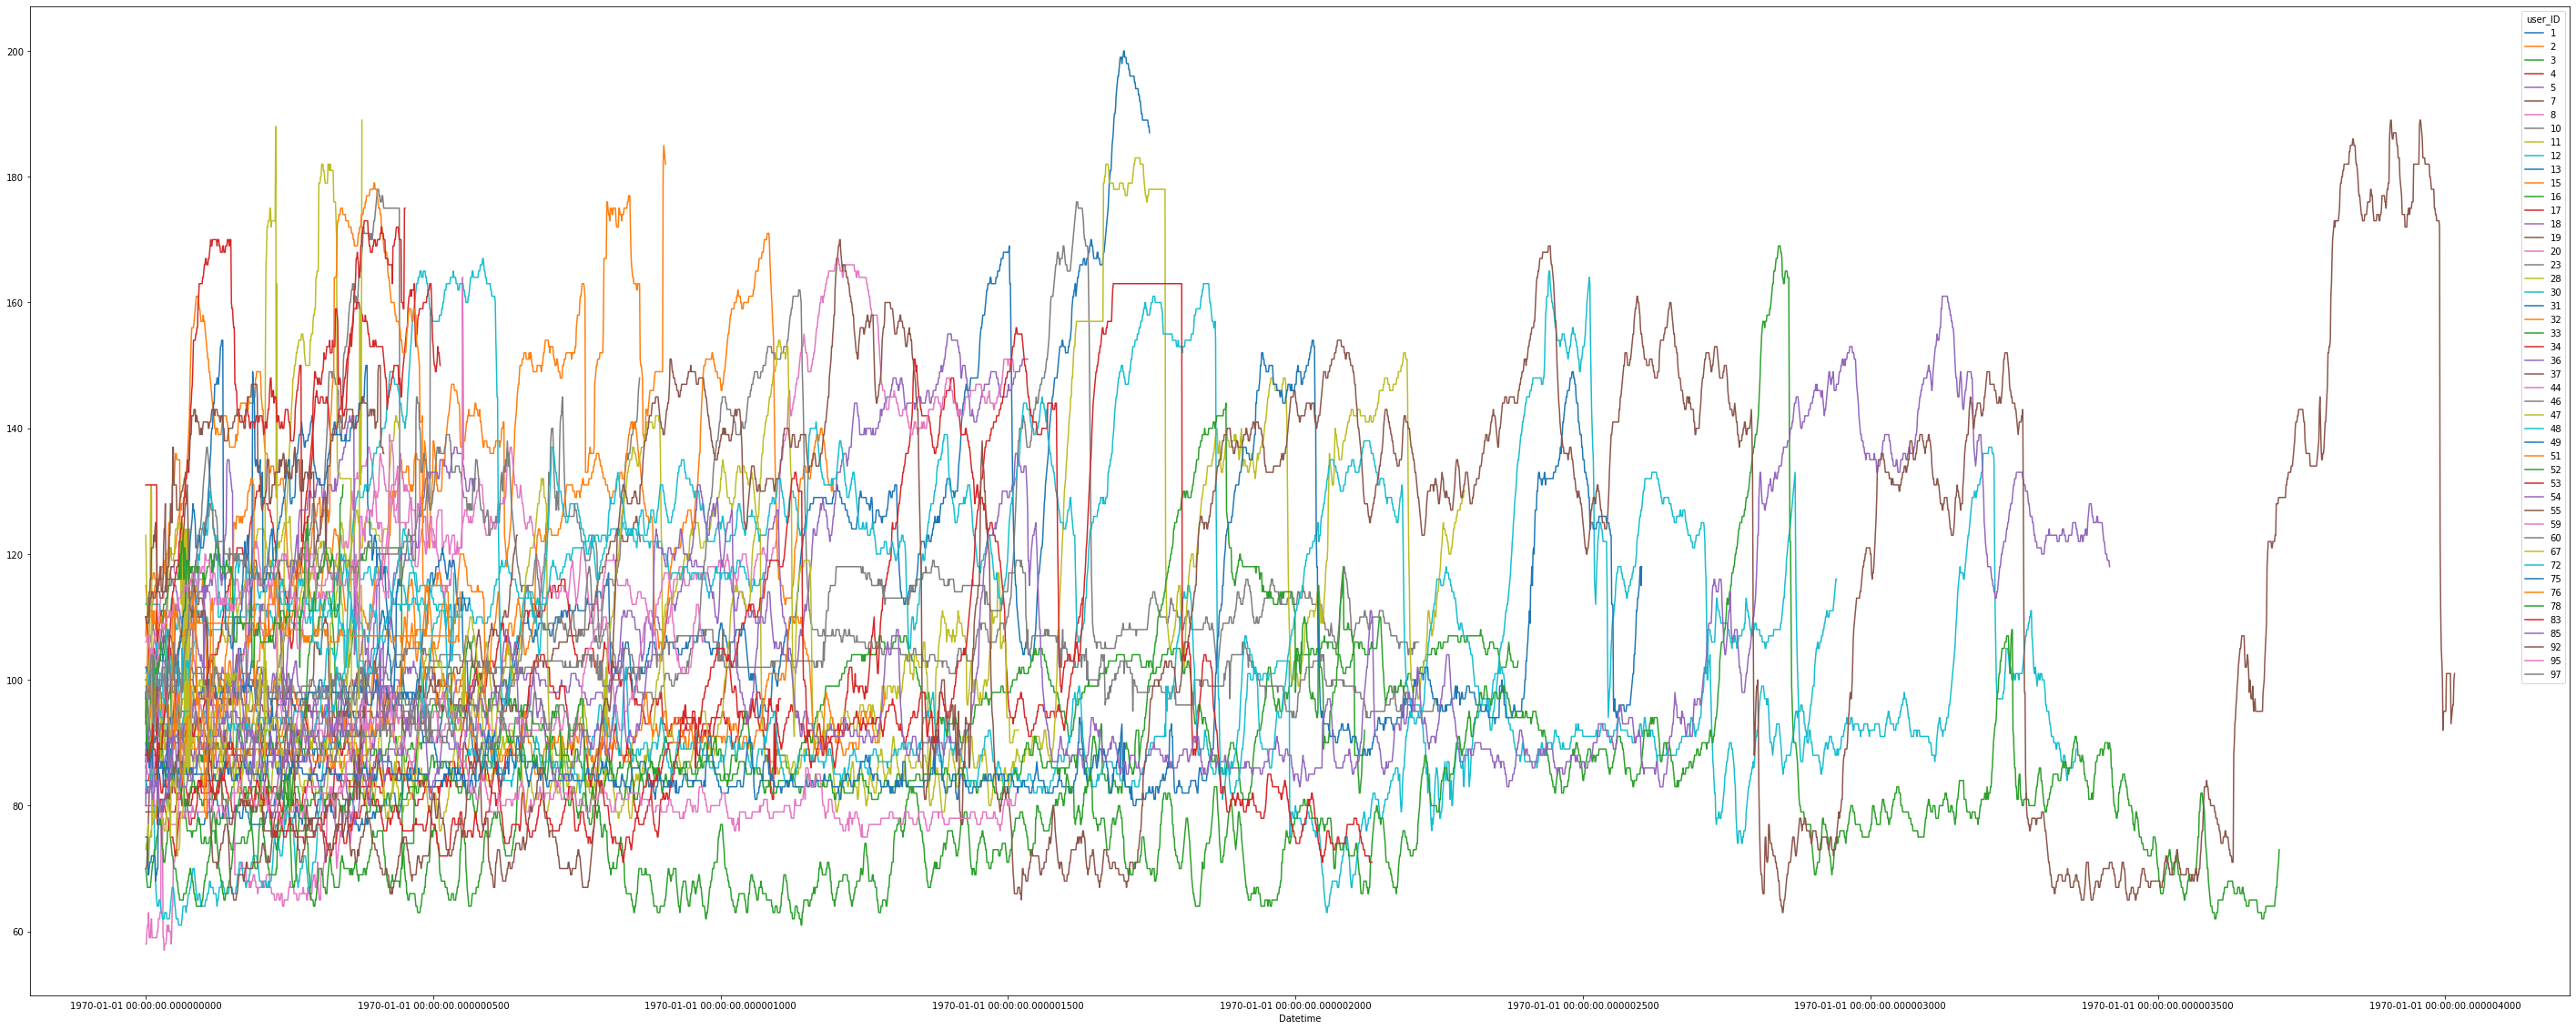

In [129]:
ax = df_pivot.plot(figsize=(50,20))

In [155]:
df_clustering = df_pivot.reset_index()
df_clustering.drop('Datetime', axis=1, inplace=True)

In [164]:
df_clustering

user_ID    1      2     3      4      5      7      8     10    11     12  \
0        87.0  115.0  86.0  100.0   80.0  100.0  102.0  93.0  93.0  112.0   
1        88.0  114.0  87.0  100.0   91.0  100.0  102.0  95.0  94.0  112.0   
2        89.0  113.0  88.0  100.0   96.0   99.0  102.0  98.0  94.0  113.0   
3        91.0  112.0  89.0  101.0   99.0   99.0  103.0  99.0  94.0  113.0   
4        91.0  111.0  90.0  101.0  102.0   98.0  104.0  99.0  94.0  113.0   
...       ...    ...   ...    ...    ...    ...    ...   ...   ...    ...   
4012      NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN   
4013      NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN   
4014      NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN   
4015      NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN   
4016      NaN    NaN   NaN    NaN    NaN    NaN    NaN   NaN   NaN    NaN   

user_ID  ...    67    72    75    76    78    83    85     92     95    97  
0        ...  73.0  97.0  75.0  99.0  98.0  88.0  82.0  110.0  106.0  97.0  
1        ...  74.0  98.0  75.0  99.0  90.0  88.0  82.0  110.0  106.0  99.0  
2        ...  74.0  98.0  75.0  98.0  90.0  88.0  82.0  110.0  107.0  99.0  
3        ...  76.0  98.0  75.0  98.0  90.0  89.0  82.0  110.0  107.0  98.0  
4        ...  77.0  99.0  69.0  99.0  90.0  88.0  83.0  111.0  107.0  98.0  
...      ...   ...   ...   ...   ...   ...   ...   ...    ...    ...   ...  
4012     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN  
4013     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN  
4014     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN  
4015     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN  
4016     ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN  

[4017 rows x 48 columns]

In [297]:
df_clustering.to_csv('df_clustering.csv')

In [70]:
df_clustering = pd.read_csv('df_clustering.csv', index_col=0)
df_clustering.head()

1      2     3      4      5      7      8    10    11     12  ...  \
0  87.0  115.0  86.0  100.0   80.0  100.0  102.0  93.0  93.0  112.0  ...   
1  88.0  114.0  87.0  100.0   91.0  100.0  102.0  95.0  94.0  112.0  ...   
2  89.0  113.0  88.0  100.0   96.0   99.0  102.0  98.0  94.0  113.0  ...   
3  91.0  112.0  89.0  101.0   99.0   99.0  103.0  99.0  94.0  113.0  ...   
4  91.0  111.0  90.0  101.0  102.0   98.0  104.0  99.0  94.0  113.0  ...   

     67    72    75    76    78    83    85     92     95    97  
0  73.0  97.0  75.0  99.0  98.0  88.0  82.0  110.0  106.0  97.0  
1  74.0  98.0  75.0  99.0  90.0  88.0  82.0  110.0  106.0  99.0  
2  74.0  98.0  75.0  98.0  90.0  88.0  82.0  110.0  107.0  99.0  
3  76.0  98.0  75.0  98.0  90.0  89.0  82.0  110.0  107.0  98.0  
4  77.0  99.0  69.0  99.0  90.0  88.0  83.0  111.0  107.0  98.0  

[5 rows x 48 columns]

In [71]:
df_clustering = df_clustering.astype({'55':'float'})  # 가장 긴 timestamp를 가진 user
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4016
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1747 non-null   float64
 1   2       905 non-null    float64
 2   3       2388 non-null   float64
 3   4       1631 non-null   float64
 4   5       1535 non-null   float64
 5   7       861 non-null    float64
 6   8       1511 non-null   float64
 7   10      860 non-null    float64
 8   11      1519 non-null   float64
 9   12      1079 non-null   float64
 10  13      636 non-null    float64
 11  15      1197 non-null   float64
 12  16      572 non-null    float64
 13  17      1105 non-null   float64
 14  18      575 non-null    float64
 15  19      647 non-null    float64
 16  20      554 non-null    float64
 17  23      2215 non-null   float64
 18  28      2295 non-null   float64
 19  30      2942 non-null   float64
 20  31      564 non-null    float64
 21  32      1287 non-null   float64
 22  

# 2. Clustering

In [252]:
df_clustering = pd.read_csv('df_clustering.csv')

In [253]:
df_clustering.head()

Unnamed: 0     1      2     3      4      5      7      8    10    11  ...  \
0           0  87.0  115.0  86.0  100.0   80.0  100.0  102.0  93.0  93.0  ...   
1           1  88.0  114.0  87.0  100.0   91.0  100.0  102.0  95.0  94.0  ...   
2           2  89.0  113.0  88.0  100.0   96.0   99.0  102.0  98.0  94.0  ...   
3           3  91.0  112.0  89.0  101.0   99.0   99.0  103.0  99.0  94.0  ...   
4           4  91.0  111.0  90.0  101.0  102.0   98.0  104.0  99.0  94.0  ...   

     67    72    75    76    78    83    85     92     95    97  
0  73.0  97.0  75.0  99.0  98.0  88.0  82.0  110.0  106.0  97.0  
1  74.0  98.0  75.0  99.0  90.0  88.0  82.0  110.0  106.0  99.0  
2  74.0  98.0  75.0  98.0  90.0  88.0  82.0  110.0  107.0  99.0  
3  76.0  98.0  75.0  98.0  90.0  89.0  82.0  110.0  107.0  98.0  
4  77.0  99.0  69.0  99.0  90.0  88.0  83.0  111.0  107.0  98.0  

[5 rows x 49 columns]

In [254]:
df_clustering.rename(columns={'Unnamed: 0':'datetime'}, inplace=True)
df_clustering['datetime'] = pd.to_datetime(df_clustering['datetime'])
df_clustering

datetime     1      2     3      4      5      7  \
0    1970-01-01 00:00:00.000000000  87.0  115.0  86.0  100.0   80.0  100.0   
1    1970-01-01 00:00:00.000000001  88.0  114.0  87.0  100.0   91.0  100.0   
2    1970-01-01 00:00:00.000000002  89.0  113.0  88.0  100.0   96.0   99.0   
3    1970-01-01 00:00:00.000000003  91.0  112.0  89.0  101.0   99.0   99.0   
4    1970-01-01 00:00:00.000000004  91.0  111.0  90.0  101.0  102.0   98.0   
...                            ...   ...    ...   ...    ...    ...    ...   
4012 1970-01-01 00:00:00.000004012   NaN    NaN   NaN    NaN    NaN    NaN   
4013 1970-01-01 00:00:00.000004013   NaN    NaN   NaN    NaN    NaN    NaN   
4014 1970-01-01 00:00:00.000004014   NaN    NaN   NaN    NaN    NaN    NaN   
4015 1970-01-01 00:00:00.000004015   NaN    NaN   NaN    NaN    NaN    NaN   
4016 1970-01-01 00:00:00.000004016   NaN    NaN   NaN    NaN    NaN    NaN   

          8    10    11  ...    67    72    75    76    78    83    85     92  \
0     102.0  93.0  93.0  ...  73.0  97.0  75.0  99.0  98.0  88.0  82.0  110.0   
1     102.0  95.0  94.0  ...  74.0  98.0  75.0  99.0  90.0  88.0  82.0  110.0   
2     102.0  98.0  94.0  ...  74.0  98.0  75.0  98.0  90.0  88.0  82.0  110.0   
3     103.0  99.0  94.0  ...  76.0  98.0  75.0  98.0  90.0  89.0  82.0  110.0   
4     104.0  99.0  94.0  ...  77.0  99.0  69.0  99.0  90.0  88.0  83.0  111.0   
...     ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   ...    ...   
4012    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4013    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4014    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4015    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   
4016    NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   

         95    97  
0     106.0  97.0  
1     106.0  99.0  
2     107.0  99.0  
3     107.0  98.0  
4     107.0  98.0  
...     ...   ...  
4012    NaN   NaN  
4013    NaN   NaN  
4014    NaN   NaN  
4015    NaN   NaN  
4016    NaN   NaN  

[4017 rows x 49 columns]

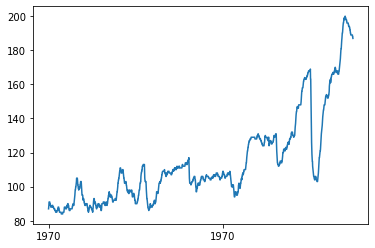

In [75]:
user_list = df_clustering.columns.tolist()[1:]
plt.plot(df_clustering['datetime'],df_clustering[user_list[0]])

In [76]:
# undersample_data = df_clustering.loc[np.linspace(df_clustering.index.min(),df_clustering.index.max(),3000).astype(int)]
# undersample_data = undersample_data.reset_index().drop('index',axis=1)
# undersample_data.fillna(0, inplace=True)

In [77]:
# undersample_data

In [78]:
# plt.plot(undersample_data.datetime,undersample_data['1'])
# plt.xlabel('timeseries',fontsize=20)
# plt.ylabel('BPM',fontsize=20)

## 2-1) Time_Series_KMeans

- k = 3

In [79]:
data_array = np.array(df_clustering.T.drop('datetime').values)
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)
user_list = df_clustering.T.drop('datetime')

In [80]:
data_array1 = data_array[0][~pd.isnull(data_array[0])] # array에서 nan값 제거

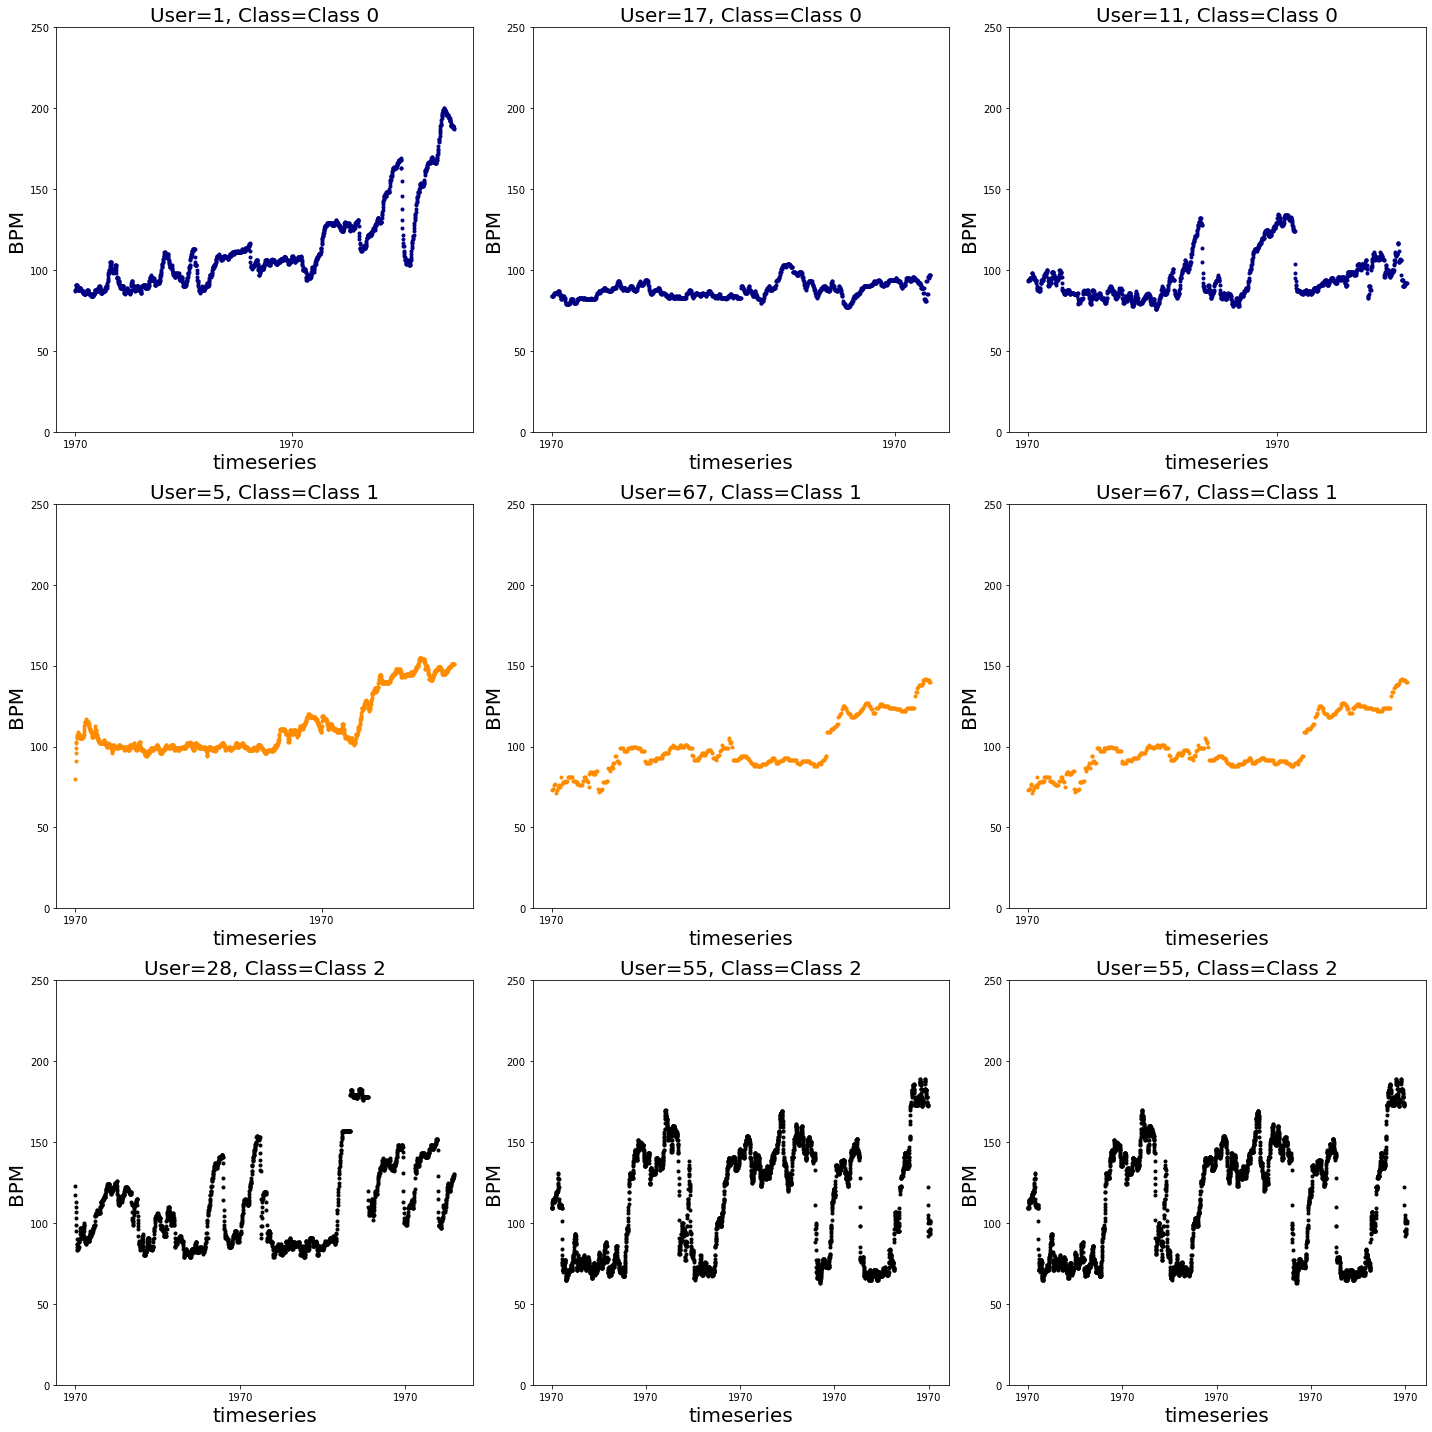

In [85]:
y = model.predict(data_array)
x = df_clustering.datetime

unique, counts = np.unique(y, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
print(uniq_cnt_dict)

plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
#          '10':3,'11':3,'12':3,'13':4,'14':4,'15':4}

colors = ['navy']*3+['darkorange']*3+['black']*3  # +['red']*3+['green']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3  # +['Class 3']*3+['Class 4']*3

for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0], replace=False)
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('BPM',fontsize=20)
    plt.xlabel('timeseries',fontsize=20)
    plt.title('User=%s, Class=%s'%(user_list.index[k],Names[j-1]),fontsize=20)
    plt.tight_layout()
    plt.ylim(0,data_array1.max()+50)

- k=5

In [90]:
# data_array = np.array(undersample_data.T.drop('datetime').values)
# from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=10)
model.fit(data_array)
# user_list = df_clustering.T.drop('datetime')

In [91]:
# data_array1 = data_array[0][~pd.isnull(data_array[0])] # array에서 nan값 제거

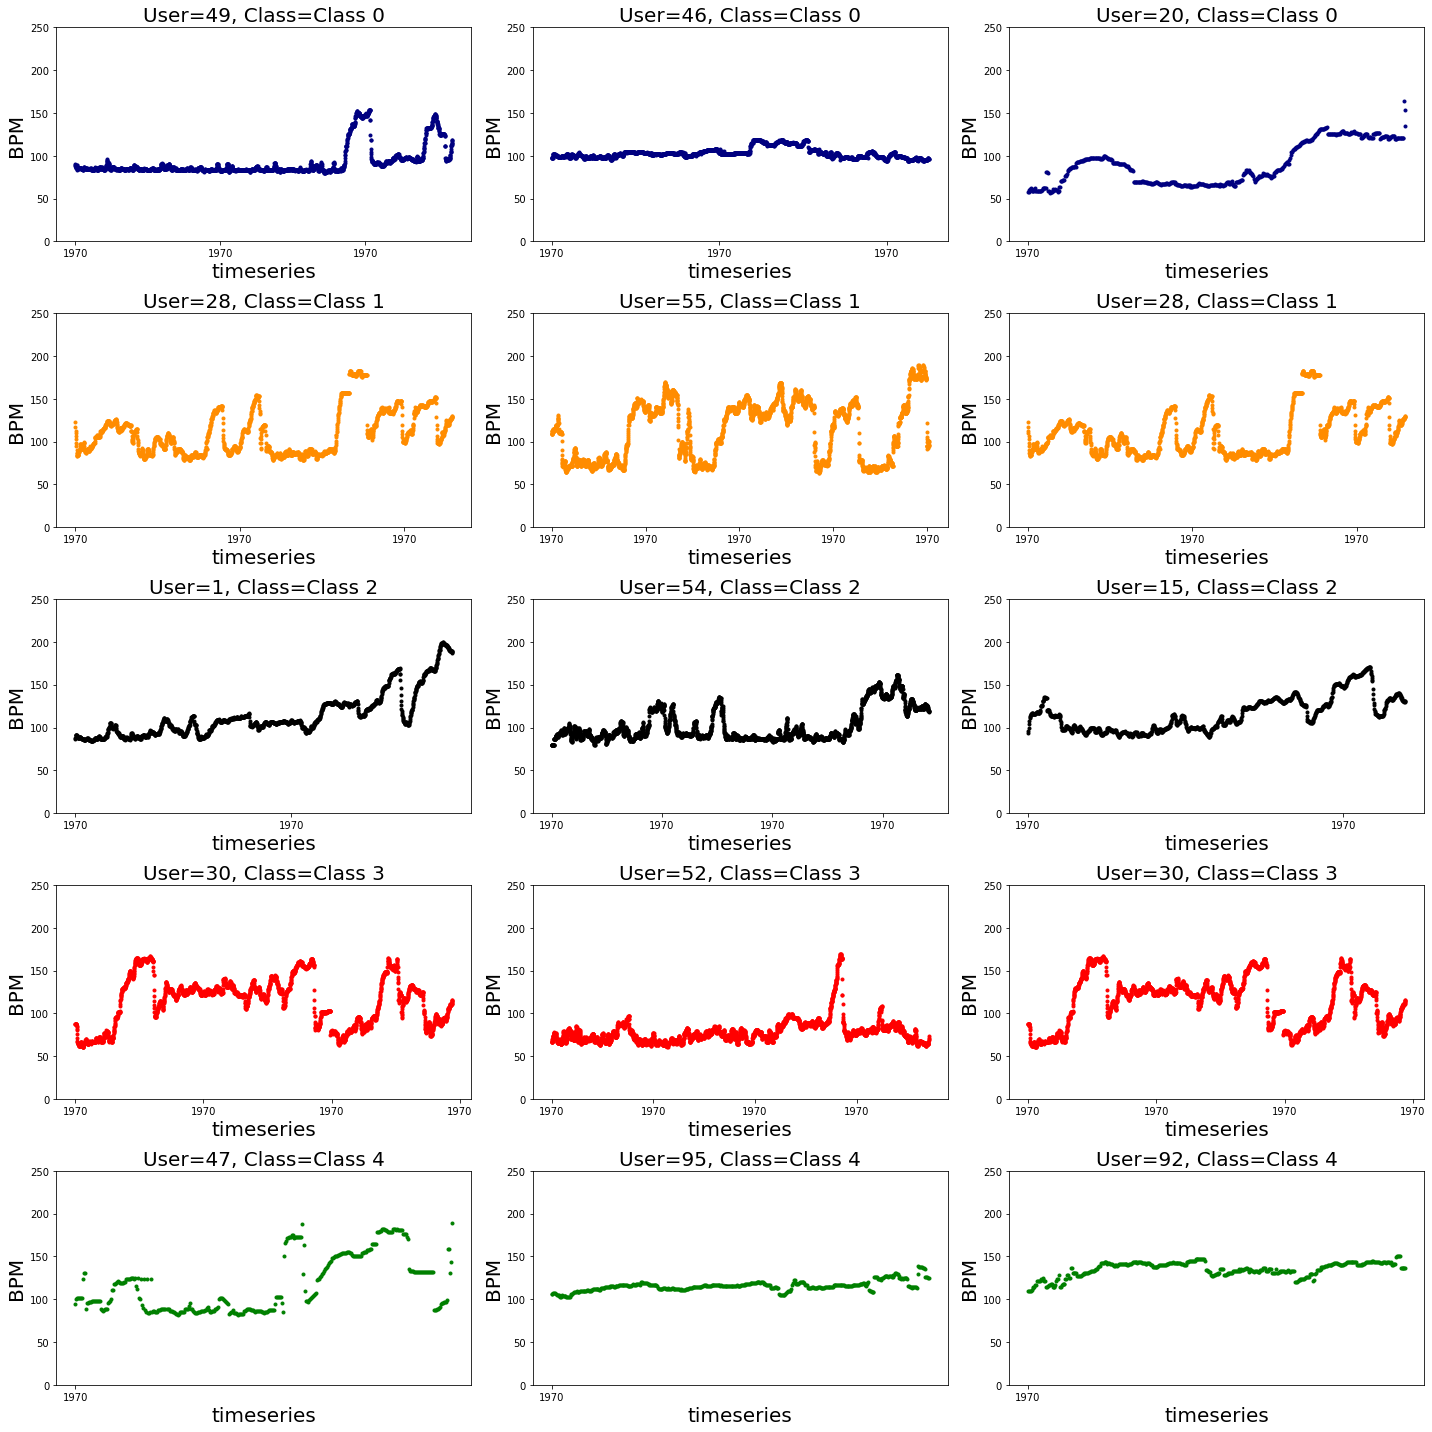

In [92]:
y = model.predict(data_array)
x = df_clustering.datetime

unique, counts = np.unique(y, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
print(uniq_cnt_dict)

plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2,
         '10':3,'11':3,'12':3,'13':4,'14':4,'15':4}

colors = ['navy']*3+['darkorange']*3+['black']*3+['red']*3+['green']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3+['Class 3']*3+['Class 4']*3

for j in range(1,16):
    plt.subplot(5,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0], replace=False)
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('BPM',fontsize=20)
    plt.xlabel('timeseries',fontsize=20)
    plt.title('User=%s, Class=%s'%(user_list.index[k],Names[j-1]),fontsize=20)
    plt.tight_layout()
    plt.ylim(0,data_array1.max()+50)

- k=7

In [93]:
# data_array = np.array(undersample_data.T.drop('datetime').values)
# from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=10)
model.fit(data_array)
# user_list = df_clustering.T.drop('datetime')

In [94]:
# data_array1 = data_array[0][~pd.isnull(data_array[0])] # array에서 nan값 제거

In [107]:
unique, counts = np.unique(y, return_counts = True)
uniq_cnt_dict = dict(zip(unique, counts))
uniq_cnt_dict

{0: 1, 1: 2, 2: 7, 3: 12, 4: 4, 5: 2, 6: 20}

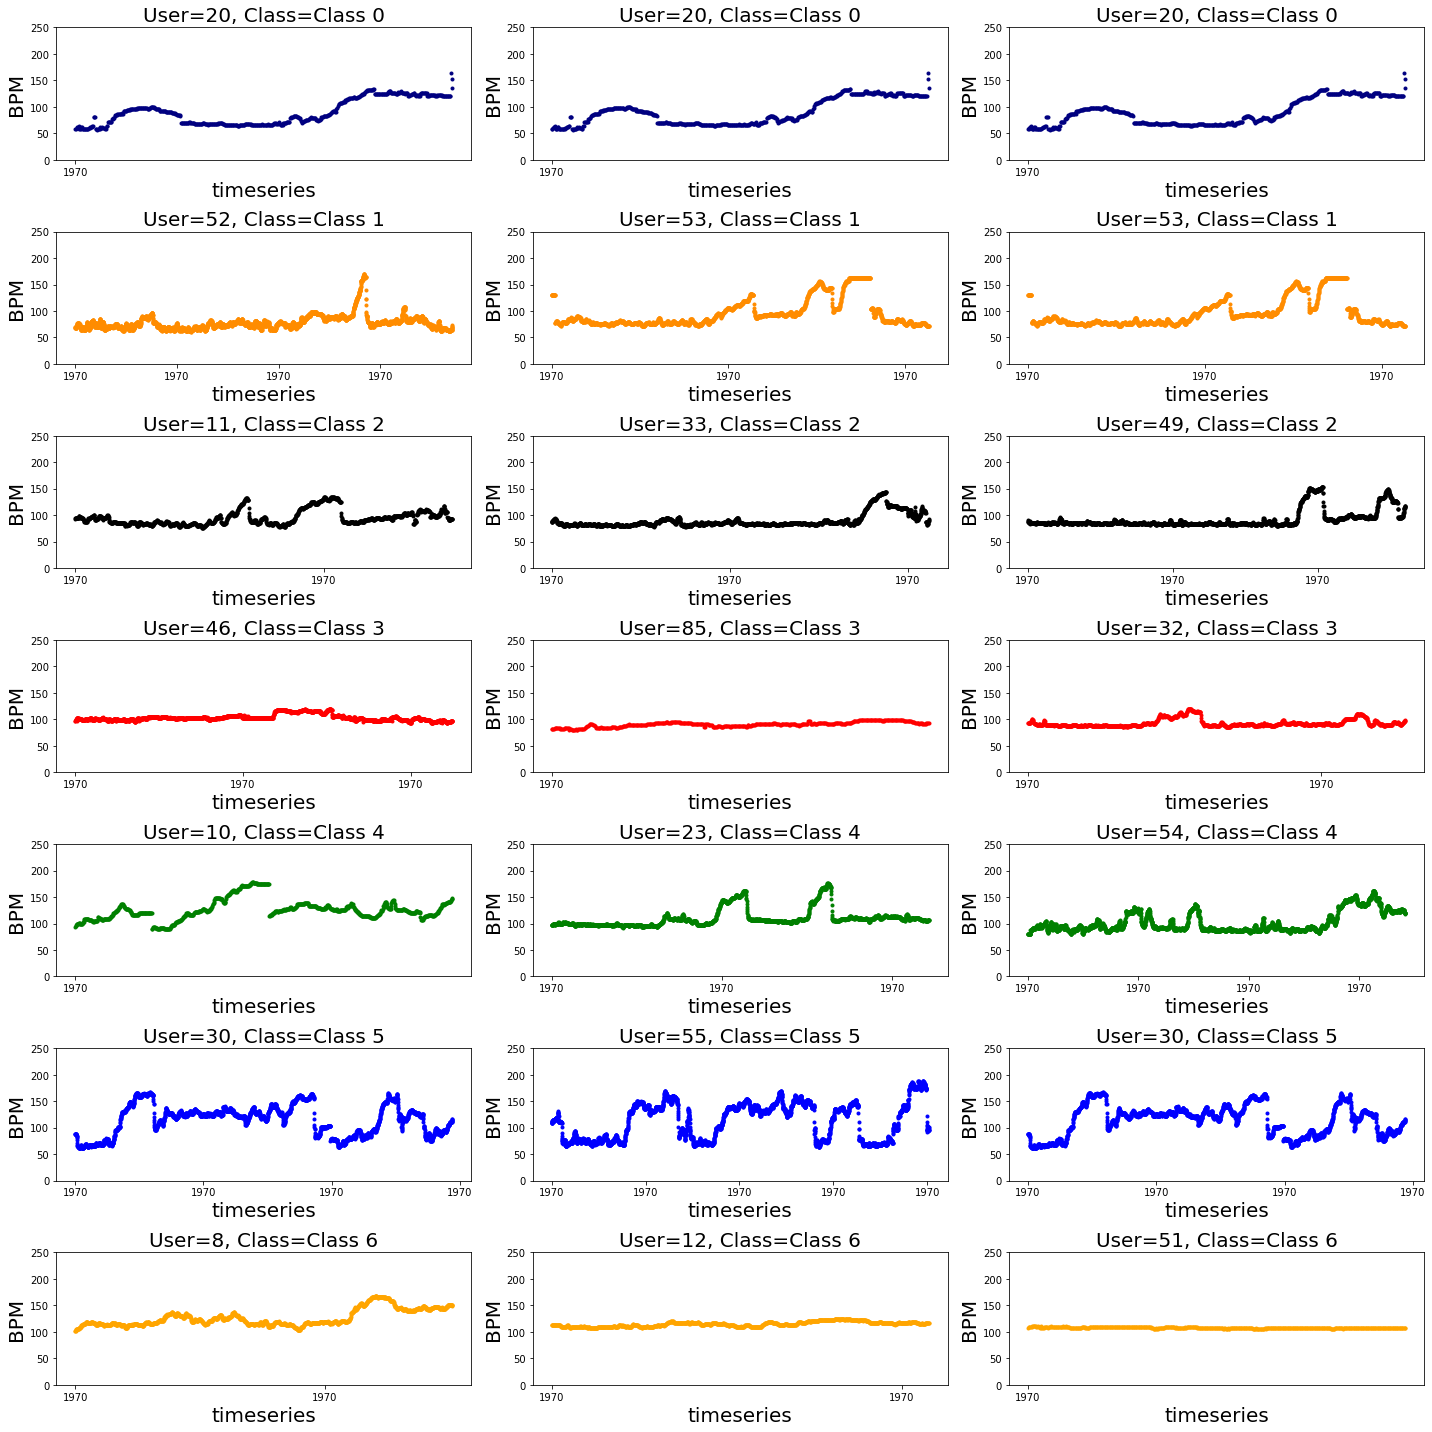

In [95]:
y = model.predict(data_array)
x = df_clustering.datetime

plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2,
         '10':3,'11':3,'12':3,'13':4,'14':4,'15':4, '16':5, '17':5,
         '18':5, '19':6, '20':6, '21':6}

colors = ['navy']*3+['darkorange']*3+['black']*3+['red']*3+['green']*3+['blue']*3+['orange']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3+['Class 3']*3+['Class 4']*3+['Class 5']*3+['Class 6']*3

for j in range(1,22):
    plt.subplot(7,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0], replace=False)
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('BPM',fontsize=20)
    plt.xlabel('timeseries',fontsize=20)
    plt.title('User=%s, Class=%s'%(user_list.index[k],Names[j-1]),fontsize=20)
    plt.tight_layout()
    plt.ylim(0,data_array1.max()+50)

# 3. T-SNE 적용 -> 저차원에서 분석 // 의미 없었음

In [260]:
y_tsne = pd.DataFrame(y, columns=['Label'])
df_tsne = df_clustering.T
df_tsne.drop(index=['datetime'], inplace=True)

In [262]:
df_tsne.head()

0      1      2      3      4      5      6      7      8      9     ...  \
1   87.0   88.0   89.0   91.0   91.0   91.0   91.0   91.0   90.0   90.0  ...   
2  115.0  114.0  113.0  112.0  111.0  111.0  110.0  110.0  110.0  110.0  ...   
3   86.0   87.0   88.0   89.0   90.0   91.0   91.0   91.0   91.0   91.0  ...   
4  100.0  100.0  100.0  101.0  101.0  102.0  104.0  104.0  105.0  105.0  ...   
5   80.0   91.0   96.0   99.0  102.0  103.0  105.0  106.0  106.0  107.0  ...   

  4007 4008 4009 4010 4011 4012 4013 4014 4015 4016  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 4017 columns]

In [263]:
df_tsne.fillna(0, inplace=True)

In [264]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(df_tsne)

In [265]:
df_tsne = pd.DataFrame(tsne, columns=["T1", "T2"])

In [266]:
df_tsne = pd.concat([df_tsne, y_tsne], axis=1)

In [267]:
df_tsne.head()

T1         T2  Label
0   67.292091 -87.114120      6
1   54.052547  88.174995      6
2  143.524658 -38.348339      3
3   99.430161 -26.734480      2
4   48.976200 -48.728825      6

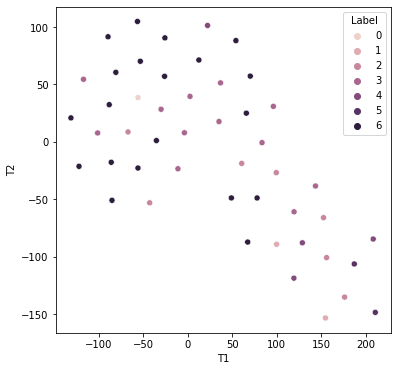

In [268]:
plt.figure(figsize=(6, 6))
sns.scatterplot(
    x = 'T1', y = 'T2',
    data = df_tsne,
    hue = 'Label',
    legend = "full",
    color = 'red',
    alpha = 1
)

plt.show()

<font color = "#CC3D3D"><p>
# End